In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from tqdm.notebook import tqdm

import os

path = "../Dataset/API Datasets/"
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

df = pd.DataFrame()
for i in tqdm(file_list_py):
    data = pd.read_csv(path + i, sep="|", encoding='utf-16', error_bad_lines=False)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)
apidata = df

## 연습용: apidata = pd.read_csv("../Dataset/API Datasets/googleAPIBookDataLucy.csv", sep="|", encoding ="utf-16")
book = pd.read_csv("../Dataset/book.csv", sep="|")

C:\Users\rmaql\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\rmaql\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
apidata

titleQueried  \
0                          Princess Poppy: The Big Mix Up   
1                          Princess Poppy: The Big Mix Up   
2                          Princess Poppy: The Big Mix Up   
3                          Princess Poppy: The Big Mix Up   
4                          Princess Poppy: The Big Mix Up   
...                                                   ...   
888730  Big Nate: Triple Decker Box Set: Big Nate: Wha...   
888731  Big Nate: Triple Decker Box Set: Big Nate: Wha...   
888732  Big Nate: Triple Decker Box Set: Big Nate: Wha...   
888733            The Crossing: Premium Hardcover Edition   
888734            The Crossing: Premium Hardcover Edition   

                                            titleFound              author  \
0                                       The Big Mix-up  Janey Louise Jones   
1                       Princess Poppy: The Big Mix Up  Janey Louise Jones   
2                                       Princess Poppy  Janey Louise Jones   
3                                       The Big Mix-up  Janey Louise Jones   
4                  Princess Poppy: The Haunted Holiday  Janey Louise Jones   
...                                                ...                 ...   
888730  Komplexität und Widerspruch in der Architektur      Robert Venturi   
888731                             Schwarz. Weiß. Tot.          Deon Meyer   
888732                       Das Kino des George Lucas                 NaN   
888733                                    The Crossing            Jo Wilde   
888734                                    The Crossing         Mandy Hager   

       language                                        description  \
0            un  A brand-new story in the best-selling Princess...   
1            un  A brand-new story in the best-selling Princess...   
2            un  A brand-new story in the best-selling Princess...   
3            un                                                NaN   
4            en  A brand-new story in the best-selling Princess...   
...         ...                                                ...   
888730       en  Robert Venturi gehört zu den Architekten, die ...   
888731       de  Superintendent John October hat vor elf Jahren...   
888732       en                                                NaN   
888733       en  I had my whole world ahead of me. Eager to tak...   
888734       en  A compelling dystopian novel; winner of the 20...   

                                                thumbnail maturityRating  \
0       http://books.google.com/books/content?id=2cPHA...     NOT_MATURE   
1       http://books.google.com/books/content?id=WY6VX...     NOT_MATURE   
2                                                     NaN     NOT_MATURE   
3                                                     NaN     NOT_MATURE   
4       http://books.google.com/books/content?id=xC7rN...     NOT_MATURE   
...                                                   ...            ...   
888730  http://books.google.com/books/content?id=dDS_A...     NOT_MATURE   
888731  http://books.google.com/books/content?id=krbXA...     NOT_MATURE   
888732  http://books.google.com/books/content?id=pkBuA...     NOT_MATURE   
888733  http://books.google.com/books/content?id=Ddtiz...     NOT_MATURE   
888734  http://books.google.com/books/content?id=geKKD...     NOT_MATURE   

              publisher publishedDate  pageCount isEbook          isbn  
0                 Corgi          2007      128.0   False  9.780553e+12  
1          Random House    2010-11-30      128.0    True  9.781409e+12  
2       Corgi Childrens    2010-08-02      128.0   False  9.780553e+12  
3                   NaN          2007      118.0   False  9.780553e+12  
4          Random House    2010-11-30      128.0    True  9.781409e+12  
...                 ...           ...        ...     ...           ...  
888730       Birkhäuser    2007-03-07      231.0   False           NaN  
888731   Aufbau Digital    2010-04-23

In [5]:
apidata[1000:1020]

titleQueried  \
1000              Der dunkle Turm 1. Schwarz   
1001              Der dunkle Turm 1. Schwarz   
1002              Der dunkle Turm 1. Schwarz   
1003              Der dunkle Turm 1. Schwarz   
1004              Der dunkle Turm 1. Schwarz   
1005              Der dunkle Turm 1. Schwarz   
1006              Der dunkle Turm 1. Schwarz   
1007              Der dunkle Turm 1. Schwarz   
1008              Der dunkle Turm 1. Schwarz   
1009  Erstes Zeichnen für Kinder ab 3 Jahren   
1010  Erstes Zeichnen für Kinder ab 3 Jahren   
1011  Erstes Zeichnen für Kinder ab 3 Jahren   
1012  Erstes Zeichnen für Kinder ab 3 Jahren   
1013  Erstes Zeichnen für Kinder ab 3 Jahren   
1014  Erstes Zeichnen für Kinder ab 3 Jahren   
1015  Erstes Zeichnen für Kinder ab 3 Jahren   
1016  Erstes Zeichnen für Kinder ab 3 Jahren   
1017  Erstes Zeichnen für Kinder ab 3 Jahren   
1018  Erstes Zeichnen für Kinder ab 3 Jahren   
1019                    Dark Deeds, Volume 3   

                                             titleFound  \
1000                                            Schwarz   
1001  Stephen Kings Der dunkle Turm, Band 1 - Der Re...   
1002                                    Der dunkle Turm   
1003                Der dunkle Turm. 1. Schwarz : Roman   
1004                        Der dunkle Turm 1. Schwarz.   
1005                                    Der dunkle Turm   
1006                        Der dunkle Turm 7. Der Turm   
1007                                    Der dunkle Turm   
1008                                    Der dunkle Turm   
1009             Erstes Zeichnen für Kinder ab 3 Jahren   
1010             Erstes Zeichnen für Kinder ab 3 Jahren   
1011  Zeichnen lernen: Linien Formen Buchstaben: Kin...   
1012          Tiere Zeichnen Lernen Schritt für Schritt   
1013                         Schwungübungen Ab 4 Jahren   
1014             Vicky Bo's Mädchen-Malbuch ab 3 Jahren   
1015          Mein Erstes Große Malbuch Für Kleinkinder   
1016         Klett Mein großes buntes Kindergarten-Buch   
1017                        Für kleine Zeichner - Tiere   
1018          Mein Erstes Große Malbuch Für Kleinkinder   
1019                                         Dark Deeds   

                                      author language  \
1000                            Stephen King       un   
1001               Stephen King, Peter David       un   
1002                                 Jae Lee       un   
1003                            Stephen King       un   
1004                            Stephen King       un   
1005                            Stephen King       de   
1006                            Stephen King       de   
1007  Stephen King, Robin Furth, Peter David       un   
1008                            Stephen King       de   
1009                                     NaN       un   
1010                                     NaN       un   
1011                        June & Lucy Kids       un   
1012                      Schulkönig Ausgabe       un   
1013                            Nadine Brand       un   
1014                                Vicky Bo       un   
1015                       Perfekte Kindheit       un   
1016                                     NaN       de   
1017                             Nico Fauser       de   
1018                       Perfekte Kindheit       un   
1019                             Mike Brooks       un   

                                            description  \
1000  Auf der Suche nach dem mysteriösen „Dunklen Tu...   
1001  Stephen Kings Hauptwerk, die siebenbändige Sag...   
1002                                                NaN   
1003                                                NaN   
1004                                                NaN   
1005                                                NaN   
1006                                                NaN   
1007                                                NaN   
1008  "Das beste Buch, das King seit mindestens zehn..

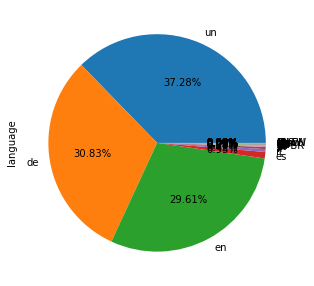

In [14]:
import matplotlib.pyplot as plt

plt.subplots(figsize=[10,5])
newEnrichedBookDataAll = apidata
dia_pie = newEnrichedBookDataAll['language'].value_counts().plot.pie(autopct = "%.2f%%")
#plt.title('Ratio of Business To Private Accounts')
plt.show()

In [7]:
# df1 = pd.read_csv("../Dataset/New API Datasets/newEnrichedBookDataSplit1.csv", encoding ="utf-16", sep="|")
# df2 = pd.read_csv("../Dataset/New API Datasets/newEnrichedBookDataSplit2.csv", encoding ="utf-16", sep="|")
# df = pd.concat([df1,df2])
# df
# print(df1['titleQueried'].nunique())
# print(df2['titleQueried'].nunique())
# df['titleQueried'].nunique()

In [8]:
len(apidata[apidata['language'] == 'un'])

337741

In [119]:
print(book.shape)
print(book.isnull().sum())
book.head(3)

(78334, 6)
itemID           0
title            0
author        3247
publisher        9
main topic     265
subtopics        0
dtype: int64


itemID                           title              author  \
0   21310  Princess Poppy: The Big Mix Up  Janey Louise Jones   
1   73018  Einfach zeichnen! Step by Step       Wiebke Krabbe   
2   19194                     Red Queen 1    Victoria Aveyard   

                            publisher main topic  \
0  Penguin Random House Children's UK        YFB   
1              Schwager und Steinlein        AGZ   
2              Orion Publishing Group        YFH   

                                           subtopics  
0                 5AH                                 
1   5AJ AGZ WFA YBG YBL YNA YPA                  ...  
2              5AP FBA

In [122]:
# cases like sep "|" didn't work properly (all the data is in itemID column)

book = book.astype({'itemID': 'str'})

for row in range(len(book)):
    if len(book['itemID'].iloc[row]) > 10:
        print(row, book['itemID'].iloc[row])
        correction = (book['itemID'].iloc[row]).split('|')
        for col in range(len(correction)):
#             print("col: ", col, correction[col])
            book.iloc[row][col] = correction[col]
book.head(5)

itemID                                      title              author  \
0  21310             Princess Poppy: The Big Mix Up  Janey Louise Jones   
1  73018             Einfach zeichnen! Step by Step       Wiebke Krabbe   
2  19194                                Red Queen 1    Victoria Aveyard   
3  40250         Meine Kindergarten-Freunde (Pirat)                 NaN   
4  46107  Mein großes Schablonen-Buch - Wilde Tiere   Elizabeth Golding   

                            publisher main topic  \
0  Penguin Random House Children's UK        YFB   
1              Schwager und Steinlein        AGZ   
2              Orion Publishing Group        YFH   
3                    Ars Edition GmbH         YB   
4             Edition Michael Fischer       WFTM   

                                           subtopics  
0                 5AH                                 
1   5AJ AGZ WFA YBG YBL YNA YPA                  ...  
2              5AP FBA                                
3      5AC 5AD YBG YBL YF                             
4   WD WFTM YBG YBL YBLD YBLN1                   ...

In [123]:
# 이상하게 seperate된 아이템 있나 확인
for i in range(len(book)):
    if len(str(book['title'].iloc[i])) > 100:
        print(i)
        
        # 없음

In [124]:
book['subtopics'] = book['subtopics'].str.replace(pat=r'[^A-Za-z0-9]', repl=r' ', regex=True)
book['subtopics'] = book['subtopics'].fillna('None')
book.tail(3)

itemID                    title                 author  \
78331  57291  Lori and the Lion's Den            A. M. Glass   
78332  78130  The Everywhere Armchair             Ersila Bee   
78333  68789        The Light Voyager  Orlando Mardi Orlando   

                 publisher main topic                               subtopics  
78331              Xlibris        YFU                                          
78332       ELOQUENT BOOKS        YFC   YFG YFH                                
78333  Trafford Publishing         FL

In [125]:
print(apidata.shape)
print(apidata.isnull().sum())
print("number of unique book: ", apidata['titleQueried'].nunique())
apidata.head(3)

(888735, 12)
titleQueried           0
titleFound           225
author            113309
language            9589
description       335576
thumbnail         119112
maturityRating      9589
publisher         396578
publishedDate      20015
pageCount         162826
isEbook             9364
isbn              231491
dtype: int64
number of unique book:  72401


titleQueried                      titleFound  \
0  Princess Poppy: The Big Mix Up                  The Big Mix-up   
1  Princess Poppy: The Big Mix Up  Princess Poppy: The Big Mix Up   
2  Princess Poppy: The Big Mix Up                  Princess Poppy   

               author language  \
0  Janey Louise Jones       un   
1  Janey Louise Jones       un   
2  Janey Louise Jones       un   

                                         description  \
0  A brand-new story in the best-selling Princess...   
1  A brand-new story in the best-selling Princess...   
2  A brand-new story in the best-selling Princess...   

                                           thumbnail maturityRating  \
0  http://books.google.com/books/content?id=2cPHA...     NOT_MATURE   
1  http://books.google.com/books/content?id=WY6VX...     NOT_MATURE   
2                                                NaN     NOT_MATURE   

         publisher publishedDate  pageCount isEbook          isbn  
0            Corgi          2007      128.0   False  9.780553e+12  
1     Random House    2010-11-30      128.0    True  9.781409e+12  
2  Corgi Childrens    2010-08-02      128.0   False  9.780553e+12

In [126]:
# remove row with no author, no title Found
# processedApi = apidata[apidata['author'].notna()]
# processedApi = processedApi[processedApi['titleFound'].notna()]

# fill na values into '' string
processedApi = apidata.copy()
processedApi['author'] = processedApi['author'].fillna('')
processedApi['titleFound'] = processedApi['titleFound'].fillna('')

In [127]:
processedApi.isnull().sum()

titleQueried           0
titleFound             0
author                 0
language            9589
description       335576
thumbnail         119112
maturityRating      9589
publisher         396578
publishedDate      20015
pageCount         162826
isEbook             9364
isbn              231491
dtype: int64

In [128]:
processedApi.head(3)

titleQueried                      titleFound  \
0  Princess Poppy: The Big Mix Up                  The Big Mix-up   
1  Princess Poppy: The Big Mix Up  Princess Poppy: The Big Mix Up   
2  Princess Poppy: The Big Mix Up                  Princess Poppy   

               author language  \
0  Janey Louise Jones       un   
1  Janey Louise Jones       un   
2  Janey Louise Jones       un   

                                         description  \
0  A brand-new story in the best-selling Princess...   
1  A brand-new story in the best-selling Princess...   
2  A brand-new story in the best-selling Princess...   

                                           thumbnail maturityRating  \
0  http://books.google.com/books/content?id=2cPHA...     NOT_MATURE   
1  http://books.google.com/books/content?id=WY6VX...     NOT_MATURE   
2                                                NaN     NOT_MATURE   

         publisher publishedDate  pageCount isEbook          isbn  
0            Corgi          2007      128.0   False  9.780553e+12  
1     Random House    2010-11-30      128.0    True  9.781409e+12  
2  Corgi Childrens    2010-08-02      128.0   False  9.780553e+12

In [129]:
# make a dataframe w/ books in common between original data and apidata
mask = processedApi['titleQueried'].isin(book['title'])
booksInCommon,processedApi_left = processedApi[mask],processedApi[~mask]

In [130]:
processedApi_left

Empty DataFrame
Columns: [titleQueried, titleFound, author, language, description, thumbnail, maturityRating, publisher, publishedDate, pageCount, isEbook, isbn]
Index: []

In [131]:
booksInCommon = booksInCommon.sort_values('titleQueried')
booksInCommon['key:title-author'] = ((booksInCommon['titleFound'] + ' '+ booksInCommon['author']).astype(str)).str.lower()
booksInCommon['key:title-author'] = booksInCommon['key:title-author'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
# booksInCommon = booksInCommon.drop_duplicates('key:title-author', keep='first') ## 확인 필요
booksInCommon.reset_index(inplace=True)
booksInCommon.drop(['index'], axis=1, inplace=True)
booksInCommon.head(3)

titleQueried         titleFound  \
0   TRIPION  minaccia dallo spazio  Te@tri nella rete   
1   TRIPION  minaccia dallo spazio          Cineforum   
2   TRIPION  minaccia dallo spazio    Jean-Luc Godard   

                          author language                 description  \
0  Maia Borelli, Nicola Savarese       it                         NaN   
1                                      it                         NaN   
2                 Roberto Chiesi       it  Filmographie (p. 101-116).   

                                           thumbnail maturityRating  \
0  http://books.google.com/books/content?id=qMwcA...     NOT_MATURE   
1  http://books.google.com/books/content?id=36cNK...     NOT_MATURE   
2  http://books.google.com/books/content?id=HtPOX...     NOT_MATURE   

         publisher publishedDate  pageCount isEbook          isbn  \
0              NaN          2004      311.0   False           NaN   
1              NaN          1999        NaN   False           NaN   
2  Gremese Editore          2003      127.0   False  9.788884e+12   

                          key:title-author  
0  tetrinellaretemaiaborellinicolasavarese  
1                                cineforum  
2               jeanlucgodardrobertochiesi

In [132]:
# booksInCommon[booksInCommon['titleQueried'] == 'Zwischen Sucht und Liebe']

In [133]:
book.isnull().sum()

itemID           0
title            0
author        3247
publisher        9
main topic     265
subtopics        0
dtype: int64

In [134]:
book['author'] = book['author'].fillna('')
book['key:title-author'] = ((book['title'] + ' '+ book['author']).astype(str)).str.lower()
book['key:title-author'] = book['key:title-author'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
book = book.sort_values('title')
book.reset_index(inplace=True)
book.drop(['index'], axis=1, inplace=True)
book.head(3)

itemID                                          title            author  \
0  26966                 TRIPION  minaccia dallo spazio  Stefano Grimaldi   
1  24125   The Ultimate Vehicle Colouring Book for Kids          Chetna .   
2  64846                                             !!                     

                       publisher main topic                         subtopics  \
0                       Lulu.com         FL                                     
1  Westland Publications Limited        YBG                                     
2                    AUTHORHOUSE         FM                                     

                               key:title-author  
0     tripionminacciadallospaziostefanogrimaldi  
1  theultimatevehiclecolouringbookforkidschetna  
2

In [136]:
book['subtopics'] = book['subtopics'].str.replace(pat=r'[^A-Za-z0-9]', repl=r' ', regex=True)
book['subtopics'] = book['subtopics'].fillna('None')

In [137]:
book[book['title'] == '!!']

itemID title author    publisher main topic  \
2  64846    !!         AUTHORHOUSE         FM   

                          subtopics key:title-author  
2

In [138]:
book['subtopics']

0                                            
1                                            
2                                            
3          5HKA                              
4          5AF Y                             
                         ...                 
78329                                        
78330     FD FM                              
78331                                        
78332                                        
78333       5AL                              
Name: subtopics, Length: 78334, dtype: object

In [139]:
# check similarity
dftemp = DataFrame(range(0),columns=list(booksInCommon.columns))
threshold = 70
threshold2 = 50  ## Conservative standards to drop unrelated apidata
j_end = 0

for i in tqdm(range(len(book))):    
    for j in range(j_end,len(boodksInCommon)):
        # if titles from two data are the same
        if book['title'].iloc[i] == booksInCommon.get('titleQueried').iloc[j]:
            j_end += 1
            # if similarity between key:title-author > threshold
            if (fuzz.token_sort_ratio(booksInCommon.get('key:title-author').iloc[j], book.get('key:title-author').iloc[i])) > threshold:
                # if similarity between titleQueried and titleFound  > threshold2, then save it as a dataframe
                if (fuzz.token_sort_ratio(booksInCommon.get('titleQueried').iloc[j], booksInCommon.get('titleFound').iloc[j])) > threshold2:
                    dftemp = dftemp.append(booksInCommon.iloc[j])     
        else:
            j_end = j
            break;

In [140]:
dftemp.reset_index(inplace=True)
dftemp.drop(['index'], axis=1, inplace=True)
display(dftemp.head(5))

titleQueried  \
0                 TRIPION  minaccia dallo spazio   
1   The Ultimate Vehicle Colouring Book for Kids   
2   The Ultimate Vehicle Colouring Book for Kids   
3   The Ultimate Vehicle Colouring Book for Kids   
4   The Ultimate Vehicle Colouring Book for Kids   

                                        titleFound            author language  \
0                " TRIPION " minaccia dallo spazio  Stefano Grimaldi       it   
1       The Ultimate Space Colouring Book for Kids  Feel Happy Books       un   
2       The Ultimate Space Colouring Book for Kids  Feel Happy Books       un   
3  " The Ultimate Vehicle Colouring Book for Kids"          Chetna .       un   
4  " The Ultimate Vehicle Colouring Book for Kids"          Chetna .       un   

                                         description  \
0  IL GENERE UMANO E' DESTINATO A SCOMPARIRE...QU...   
1  A space colouring book for kids that is out of...   
2  A space colouring book for kids that is out of...   
3                                                NaN   
4                                                NaN   

                                           thumbnail maturityRating publisher  \
0  http://books.google.com/books/content?id=HuPeB...     NOT_MATURE  Lulu.com   
1  http://books.google.com/books/content?id=w005y...     NOT_MATURE       NaN   
2  http://books.google.com/books/content?id=w005y...     NOT_MATURE       NaN   
3                                                NaN     NOT_MATURE       NaN   
4                                                NaN     NOT_MATURE       NaN   

  publishedDate  pageCount isEbook          isbn  \
0    2014-07-06       58.0   False  9.781292e+12   
1    2019-08-30      106.0   False  9.781911e+12   
2    2019-08-30      106.0   False  9.781911e+12   
3    2020-08-31      104.0   False  9.789390e+12   
4    2020-08-31      104.0   False  9.789390e+12   

                                    key:title-author  
0          tripionminacciadallospaziostefanogrimaldi  
1  theultimatespacecolouringbookforkidsfeelhappyb...  
2  theultimatespacecolouringbookforkidsfeelhappyb...  
3       theultimatevehiclecolouringbookforkidschetna  
4       theultimatevehiclecolouringbookforkidschetna

In [141]:
dftemp.to_csv("dftemp.csv", sep="|")

In [142]:
# check whether they are from collection, the same book, or different book
n = 8

dftemp2 = dftemp.copy()
dftemp2['titleQueried'] = (dftemp2['titleQueried']).astype(str).str.lower()
dftemp2['titleFound'] =(dftemp2['titleFound']).astype(str).str.lower()
dftemp2["titleQueried"] = dftemp2["titleQueried"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
dftemp2["titleFound"] = dftemp2["titleFound"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

diffList = []
sameList = []
collectionList = []

for i in tqdm(range(len(dftemp2))):
    # if title is not the same --> need to further check
    if dftemp2.get('titleQueried').iloc[i] != dftemp2.get('titleFound').iloc[i]:
        ## if titleQueried and titleFound similarity < 97 --> need to further check 
        if fuzz.token_sort_ratio(dftemp2.get('titleQueried').iloc[i], dftemp2.get('titleFound').iloc[i]) < 97:
            ### if firt n-letter similarity > 80 --> they are from a collection
            if (fuzz.token_sort_ratio(dftemp2.get('titleQueried').iloc[i][:n], dftemp2.get('titleFound').iloc[i][:n]) > 80):
                collectionList.append(dftemp.iloc[i])
            elif fuzz.token_sort_ratio(dftemp2.get('titleQueried').iloc[i], dftemp2.get('titleFound').iloc[i]) > 70:
                collectionList.append(dftemp.iloc[i])
            else:
                diffList.append(dftemp.iloc[i])
        ## if titleQueried and titleFound similarity > 97, they are the same book 
        else:
            sameList.append(dftemp.iloc[i])
    # if titme is the same, they are the same book
    else:
        sameList.append(dftemp.iloc[i])
            
collectionDf = pd.DataFrame(collectionList)
diffDf = pd.DataFrame(diffList)
sameDf = pd.DataFrame(sameList)

In [143]:
#fuzz.token_sort_ratio('Alex Rider 2: Stormbreaker', 'Alex Rider 1: Stormbreaker')

### collection: collection(1) same book(2)

In [144]:
# collectionDf, diffDf, sameDf
diffDf.to_excel('diffDf.xlsx')
diffDf

titleQueried  \
5                            #4 Happy Birthday, Mallory!   
8                            #4 Happy Birthday, Mallory!   
139           'n Gotiese Kers Engel (Afrikaanse uitgawe)   
140           'n Gotiese Kers Engel (Afrikaanse uitgawe)   
143           'n Gotiese Kers Engel (Afrikaanse uitgawe)   
...                                                  ...   
154894                                     Ætherresonanz   
154912                  Österreich, Rätseln und Stickern   
154913                  Österreich, Rätseln und Stickern   
154943  Übernatürliche Irreführung (Sasha Urban Serie 5)   
154946  Übernatürliche Irreführung (Sasha Urban Serie 5)   

                                               titleFound  \
5                         #06 Heart to Heart with Mallory   
8                         #06 Heart to Heart with Mallory   
139       Die Horlosiemaker: 'n Novelle (Afrikaanse Taal)   
140                    Put van Drome (Afrikaanse uitgawe)   
143                    Put van Drome (Afrikaanse uitgawe)   
...                                                   ...   
154894                                        Aetherhertz   
154912                   Rätseln und Stickern: Österreich   
154913                   Rätseln und Stickern: Österreich   
154943  Widerspenstiges Medium (Sasha Urban Serie: Buc...   
154946         Schwarzseherin (Sasha Urban Serie: Buch 2)   

                         author language  \
5               Laurie Friedman       en   
8               Laurie Friedman       en   
139             Anna Erishkigal       af   
140             Anna Erishkigal       af   
143             Anna Erishkigal       af   
...                         ...      ...   
154894               Anja Bagus       de   
154912              Lisa Hebler       un   
154913              Lisa Hebler       un   
154943  Dima Zales, Anna Zaires       de   
154946  Dima Zales, Anna Zaires       de   

                                              description  \
5       Valentine's Day is approaching and everyone se...   
8       Valentine's Day is approaching and everyone se...   
139     --Vra hoe jy ‘n uur in tyd kan wen-- . Marae O...   
140     Al wat Rosie Xalbadore wil hê is ‘n werk vir d...   
143     Al wat Rosie Xalbadore wil hê is ‘n werk vir d...   
...                                                   ...   
154894  Ein Annabelle Rosenherz Roman:Seit der Jahrhun...   
154912                                                NaN   
154913                                                NaN   
154943  Das Leben als Seherin ist auch nicht das Gelbe...   
154946  Ich bin also eine Seherin. Eine der Cogniti un...   

                                                thumbnail maturityRating  \
5       http://books.google.com/books/content?id=dMH-L...     NOT_MATURE   
8       http://books.google.com/books/content?id=dMH-L...     NOT_MATURE   
139     http://books.google.com/books/content?id=BwyvD...     NOT_MATURE   
140     http://books.google.com/books/content?id=A8KbD...     NOT_MATURE   
143     http://books.google.com/books/content?id=A8KbD...     NOT_MATURE   
...                                                   ...            ...   
154894  http://books.google.com/books/content?id=zaXtn...     NOT_MATURE   
154912  http://books.google.com/books/content?id=l4_HA...     NOT_MATURE   
154913  http://books.google.com/books/content?id=l4_HA...     NOT_MATURE   
154943  http://books.google.com/books/content?id=0xiMD...     NOT_MATURE   
154946  http://books.google.com/books/content?id=5cCED...     NOT_MATURE   

                                          publisher publishedDate  pageCount  \
5                                       Darby Creek    2006-08-01      160.0   
8                                       Darby Creek    2006-08-01      160.0   
139                                  Seraphim Press    2016-07-16       82.0   
140                                  Seraphim Press    2019-06-06      260.0   
143            

In [145]:
collectionDf['collection'] = 1
collectionDf
collectionDf.to_excel('collectionDf.xlsx')

In [146]:
sameDf['collection'] = 2
sameDf

titleQueried  \
0                         TRIPION  minaccia dallo spazio   
3           The Ultimate Vehicle Colouring Book for Kids   
4           The Ultimate Vehicle Colouring Book for Kids   
6                            #4 Happy Birthday, Mallory!   
7                            #4 Happy Birthday, Mallory!   
...                                                  ...   
154942                               Übernachtungs-Party   
154944  Übernatürliche Irreführung (Sasha Urban Serie 5)   
154947   Überschneidung zweier untersschiedlicher Welten   
154948                             Übersinnlicher Retter   
154951                      Üxe, der Fischstäbchen-Troll   

                                              titleFound  \
0                      " TRIPION " minaccia dallo spazio   
3        " The Ultimate Vehicle Colouring Book for Kids"   
4        " The Ultimate Vehicle Colouring Book for Kids"   
6                               Happy Birthday, Mallory!   
7                               Happy Birthday, Mallory!   
...                                                  ...   
154942                               Übernachtungs-Party   
154944  Übernatürliche Irreführung (Sasha Urban Serie 5)   
154947   Überschneidung zweier untersschiedlicher Welten   
154948                             Übersinnlicher Retter   
154951                      Üxe, der Fischstäbchen-Troll   

                             author language  \
0                  Stefano Grimaldi       it   
3                          Chetna .       un   
4                          Chetna .       un   
6                   Laurie Friedman       en   
7                Laurie B. Friedman       un   
...                             ...      ...   
154942                                    un   
154944      Dima Zales, Anna Zaires       un   
154947                WErner Röschl       un   
154948                  Tina Folsom       un   
154951  Ursel Scheffler, Jutta Timm       un   

                                              description  \
0       IL GENERE UMANO E' DESTINATO A SCOMPARIRE...QU...   
3                                                     NaN   
4                                                     NaN   
6       Audisee® eBooks with Audio combine professiona...   
7       After a difficult year, Mallory plans a month-...   
...                                                   ...   
154942                                                NaN   
154944  Da ich meine Seherkräfte endlich unter Kontrol...   
154947  Wenn du nach getaner Arbeit nachhause kommst u...   
154948  Als eine Hellseherin Pearce warnt, dass er von...   
154951  Malte ist ein schüchterner und ernster Junge. ...   

                                                thumbnail maturityRating  \
0       http://books.google.com/books/content?id=HuPeB...     NOT_MATURE   
3                                                     NaN     NOT_MATURE   
4                                                     NaN     NOT_MATURE   
6       http://books.google.com/books/content?id=ZkrBD...     NOT_MATURE   
7       http://books.google.com/books/content?id=I4gAC...     NOT_MATURE   
...                                                   ...            ...   
154942                                                NaN     NOT_MATURE   
154944  http://books.google.com/books/content?id=8fsgy...     NOT_MATURE   
154947  http://books.google.com/books/content?id=IB-gD...     NOT_MATURE   
154948  http://books.google.com/books/content?id=G0iZx...     NOT_MATURE   
154951  http://books.google.com/books/content?id=pJsqS...     NOT_MATURE   

                    publisher publishedDate  pageCount  isEbook          isbn  \
0                    Lulu.com    2014-07-06       58.0    False  9.781292e+12   
3                         NaN    2020-08-31      104.0    False  9.789390e+12   
4                         NaN    2020-08-31      104.0    False  9.789390e+12   
6             Millbrook Press    2017-01-01      160.0 

### need to go over diffDF/collectionDF mannually --> add to  sameDf / collectionDf if necessary

In [147]:
# mergedDf (sameDf + collectionDf)
merged = pd.concat([sameDf, collectionDf])
merged.sort_values('titleQueried')
merged.rename(columns = {'titleQueried':'title'}, inplace=True)
merged

title  \
0                          TRIPION  minaccia dallo spazio   
3            The Ultimate Vehicle Colouring Book for Kids   
4            The Ultimate Vehicle Colouring Book for Kids   
6                             #4 Happy Birthday, Mallory!   
7                             #4 Happy Birthday, Mallory!   
...                                                   ...   
154922                       Österreichische Volksmärchen   
154938                                 Überlebensprogramm   
154945   Übernatürliche Irreführung (Sasha Urban Serie 5)   
154949  Übungsheft Handlettering: Übungsbuch Für Hand ...   
154950  Übungsheft Handlettering: Übungsbuch Für Hand ...   

                                               titleFound  \
0                       " TRIPION " minaccia dallo spazio   
3         " The Ultimate Vehicle Colouring Book for Kids"   
4         " The Ultimate Vehicle Colouring Book for Kids"   
6                                Happy Birthday, Mallory!   
7                                Happy Birthday, Mallory!   
...                                                   ...   
154922                      Oesterreichische Volksmärchen   
154938                             Das Überlebensprogramm   
154945  Übernatürliche Irreführung (Sasha Urban Serie:...   
154949  Übungsheft Handlettering: Übungsbuch Für Hand ...   
154950  Übungsheft Handlettering: Übungsbuch Für Hand ...   

                                                   author language  \
0                                        Stefano Grimaldi       it   
3                                                Chetna .       un   
4                                                Chetna .       un   
6                                         Laurie Friedman       en   
7                                      Laurie B. Friedman       un   
...                                                   ...      ...   
154922                                   Franz Tschischka       de   
154938                                    Frederic Vester       un   
154945                            Dima Zales, Anna Zaires       un   
154949                             Sunshine Handlettering       de   
154950  Handlettering Heft In Din A5, Sunshine Handlet...       un   

                                              description  \
0       IL GENERE UMANO E' DESTINATO A SCOMPARIRE...QU...   
3                                                     NaN   
4                                                     NaN   
6       Audisee® eBooks with Audio combine professiona...   
7       After a difficult year, Mallory plans a month-...   
...                                                   ...   
154922                                                NaN   
154938                                                NaN   
154945  Da ich meine Seherkräfte endlich unter Kontrol...   
154949  Blanko Übungsheft für Handschriften und Handle...   
154950  Das erwartet Dich bei diesem Übungsheft: Blank...   

                                                thumbnail maturityRating  \
0       http://books.google.com/books/content?id=HuPeB...     NOT_MATURE   
3                                                     NaN     NOT_MATURE   
4                                                     NaN     NOT_MATURE   
6       http://books.google.com/books/content?id=ZkrBD...     NOT_MATURE   
7       http://books.google.com/books/content?id=I4gAC...     NOT_MATURE   
...                                                   ...            ...   
154922  http://books.google.com/books/content?id=O7jYA...     NOT_MATURE   
154938                                                NaN     NOT_MATURE   
154945  http://books.google.com/books/content?id=53u5D...     NOT_MATURE   
154949  http://books.google.com/books/content?id=ii_lw...     NOT_MATURE   
154950  http://books.google.com/books/content?id=j6PSw...     NOT_MATURE   

                      publisher publishedDate  pageCount  isEbook  \
0                      Lulu.co

In [148]:
apidata[apidata['titleQueried'] == ' TRIPION  minaccia dallo spazio']

titleQueried  \
239102   TRIPION  minaccia dallo spazio   
239103   TRIPION  minaccia dallo spazio   
239104   TRIPION  minaccia dallo spazio   
239105   TRIPION  minaccia dallo spazio   
239106   TRIPION  minaccia dallo spazio   
239107   TRIPION  minaccia dallo spazio   
239108   TRIPION  minaccia dallo spazio   
239109   TRIPION  minaccia dallo spazio   
239110   TRIPION  minaccia dallo spazio   
239111   TRIPION  minaccia dallo spazio   
567006   TRIPION  minaccia dallo spazio   

                                               titleFound  \
239102                  " TRIPION " minaccia dallo spazio   
239103                                          Cineforum   
239104                                          Casabella   
239105                  Italia e popolo giornale politico   
239106                                    Jean-Luc Godard   
239107  Il Corriere israelitico. Periodico mensile per...   
239108                         “L'”Eco delle alpi retiche   
239109  Il legionario organo dei fasci italiani all'es...   
239110                                  Te@tri nella rete   
239111                          Le macchine del progresso   
567006                           No items from Google API   

                               author language  \
239102               Stefano Grimaldi       it   
239103                            NaN       it   
239104                            NaN       it   
239105                            NaN       it   
239106                 Roberto Chiesi       it   
239107            Angelo ..... Curiel       it   
239108                            NaN       it   
239109                            NaN       it   
239110  Maia Borelli, Nicola Savarese       it   
239111                Franco Robecchi       it   
567006                            NaN      NaN   

                                              description  \
239102  IL GENERE UMANO E' DESTINATO A SCOMPARIRE...QU...   
239103                                                NaN   
239104                                                NaN   
239105                                                NaN   
239106                         Filmographie (p. 101-116).   
239107                                                NaN   
239108                                                NaN   
239109                                                NaN   
239110                                                NaN   
239111                                                NaN   
567006                                                NaN   

                                                thumbnail maturityRating  \
239102  http://books.google.com/books/content?id=HuPeB...     NOT_MATURE   
239103  http://books.google.com/books/content?id=36cNK...     NOT_MATURE   
239104  http://books.google.com/books/content?id=QYNMA...     NOT_MATURE   
239105  http://books.google.com/books/content?id=JowSS...     NOT_MATURE   
239106  http://books.google.com/books/content?id=HtPOX...     NOT_MATURE   
239107  http://books.google.com/books/content?id=KCpng...     NOT_MATURE   
239108  http://books.google.com/books/content?id=Nq2ZH...     NOT_MATURE   
239109  http://books.google.com/books/content?id=1_Um2...     NOT_MATURE   
239110  http://books.google.com/books/content?id=qMwcA...     NOT_MATURE   
239111  http://books.google.com/books/content?id=TKQfA...     NOT_MATURE   
567006                                                NaN            NaN   

                        publisher publishedDate  pageCount isEbook  \
239102                   Lulu.com    2014-07-06       58.0   False   
239103                        NaN          1999        NaN   False   
239104                        NaN          1995        NaN   False   
239105                        NaN          1856        NaN    True   
239106            Gremese Editore          2003      127.0   False   
239107                        NaN          1868        NaN    True   
239108                        NaN       

In [149]:
book[book['title'] == ' TRIPION  minaccia dallo spazio']

itemID                            title            author publisher  \
0  26966   TRIPION  minaccia dallo spazio  Stefano Grimaldi  Lulu.com   

  main topic                         subtopics  \
0         FL                                     

                            key:title-author  
0  tripionminacciadallospaziostefanogrimaldi

In [150]:
book['title'].iloc[0]

' TRIPION  minaccia dallo spazio'

In [151]:
book

itemID                                              title  \
0      26966                     TRIPION  minaccia dallo spazio   
1      24125       The Ultimate Vehicle Colouring Book for Kids   
2      64846                                                 !!   
3      64745                        #4 Happy Birthday, Mallory!   
4       7780                                #Basteln for Future   
...      ...                                                ...   
78329  21473   Übernatürliche Irreführung (Sasha Urban Serie 5)   
78330  35275    Überschneidung zweier untersschiedlicher Welten   
78331  50552                              Übersinnlicher Retter   
78332   5665  Übungsheft Handlettering: Übungsbuch Für Hand ...   
78333  64012                       Üxe, der Fischstäbchen-Troll   

                                                  author  \
0                                       Stefano Grimaldi   
1                                               Chetna .   
2                                                          
3                                        Laurie Friedman   
4                  Susanne Pypke, Naturschutzjugend NAJU   
...                                                  ...   
78329                            Dima Zales, Anna Zaires   
78330                                      WErner Röschl   
78331                                        Tina Folsom   
78332  Sunshine Handlettering, Handlettering Heft In ...   
78333                                    Ursel Scheffler   

                           publisher main topic  \
0                           Lulu.com         FL   
1      Westland Publications Limited        YBG   
2                        AUTHORHOUSE         FM   
3                        DARBY CREEK         YF   
4                  Frech Verlag GmbH         WF   
...                              ...        ...   
78329                    MOZAIKA LLC        FMX   
78330                Books on Demand         FD   
78331              Duboce Park Press        FRT   
78332        INDEPENDENTLY PUBLISHED        YNV   
78333     Rowohlt Taschenbuch Verlag        YFQ   

                                  subtopics  \
0                                             
1                                             
2                                             
3        5HKA                                 
4        5AF Y                                
...                                     ...   
78329                                         
78330   FD FM                                 
78331                                         
78332                                         
78333     5AL                                 

                                        key:title-author  
0              tripionminacciadallospaziostefanogrimaldi  
1           theultimatevehiclecolouringbookforkidschetna  
2                                                         
3                    4happybirthdaymallorylauriefriedman  
4      bastelnforfuturesusannepypkenaturschutzjugendnaju  
...                                                  ...  
78329  übernatürlicheirreführungsashaurbanserie5dimaz...  
78330  überschneidungzweieruntersschiedlicherweltenwe...  
78331                     übersinnlicherrettertinafolsom  
78332  übungshefthandletteringübungsbuchfürhandletter...  
78333             üxederfischstäbchentrollurselscheffler  

[78334 rows x 7 columns]

In [152]:
# addedData['title'].iloc[245864]

In [153]:
apidata[apidata['titleQueried'] == 'Üxe, der Fischstäbchen-Troll']

titleQueried  \
518926  Üxe, der Fischstäbchen-Troll   
518927  Üxe, der Fischstäbchen-Troll   
518928  Üxe, der Fischstäbchen-Troll   
518929  Üxe, der Fischstäbchen-Troll   
518930  Üxe, der Fischstäbchen-Troll   
518931  Üxe, der Fischstäbchen-Troll   
518932  Üxe, der Fischstäbchen-Troll   
518933  Üxe, der Fischstäbchen-Troll   
518934  Üxe, der Fischstäbchen-Troll   
518935  Üxe, der Fischstäbchen-Troll   

                                               titleFound  \
518926                       Üxe, der Fischstäbchen-Troll   
518927                                 Hallo, lieber Üxe!   
518928  Deutsche Nationalbibliographie und Bibliograph...   
518929             Theosophie - Verwaltungsfachhochschule   
518930  Deutsche Nationalbibliographie und Bibliograph...   
518931           Börsenblatt für den deutschen Buchhandel   
518932                                    1000 und 1 Buch   
518933                           Zum laut und leise Lesen   
518934                              German books in print   
518935  Deutsche Nationalbibliographie und Bibliograph...   

                             author language  \
518926  Ursel Scheffler, Jutta Timm       un   
518927              Ursel Scheffler       un   
518928                          NaN       de   
518929                          NaN       de   
518930                          NaN       de   
518931                          NaN       de   
518932                          NaN       de   
518933               Peter Härtling       de   
518934                          NaN       de   
518935                          NaN       de   

                                              description  \
518926  Malte ist ein schüchterner und ernster Junge. ...   
518927  Unabh. Forts. von: Üxe, der Fischstäbchentroll...   
518928                                                NaN   
518929                                                NaN   
518930                                                NaN   
518931                                                NaN   
518932                                                NaN   
518933  10 korte historier om børn, krig, sult, ensomh...   
518934                                                NaN   
518935                                                NaN   

                                                thumbnail maturityRating  \
518926  http://books.google.com/books/content?id=pJsqS...     NOT_MATURE   
518927                                                NaN     NOT_MATURE   
518928  http://books.google.com/books/content?id=hjBNA...     NOT_MATURE   
518929  http://books.google.com/books/content?id=fa9YA...     NOT_MATURE   
518930  http://books.google.com/books/content?id=9fdBA...     NOT_MATURE   
518931  http://books.google.com/books/content?id=CCw3A...     NOT_MATURE   
518932  http://books.google.com/books/content?id=z2INZ...     NOT_MATURE   
518933  http://books.google.com/books/content?id=ygwKA...     NOT_MATURE   
518934  http://books.google.com/books/content?id=m6EnA...     NOT_MATURE   
518935  http://books.google.com/books/content?id=0l0vA...     NOT_MATURE   

       publisher publishedDate  pageCount isEbook          isbn  
518926       NaN          1990      156.0   False  9.783499e+12  
518927       NaN          1992      141.0   False  9.783499e+12  
518928       NaN          1990        NaN   False           NaN  
518929       NaN          1995        NaN   False  9.783766e+12  
518930       NaN          2001        NaN   False           NaN  
518931       NaN          1990        NaN   False           NaN  
518932       NaN          1991        NaN   False           NaN  
518933       NaN          1978       59.0   False           NaN  
518934       NaN          1995        NaN   False           NaN  
518935       NaN          1990        NaN   False           NaN

In [154]:
# add api data to items.csv data
addedData = pd.merge(book, merged, how="outer", on="title")
addedData.drop(['key:title-author_x', 'key:title-author_y'], axis=1, inplace=True)
addedData

itemID                                              title  \
0       26966                     TRIPION  minaccia dallo spazio   
1       24125       The Ultimate Vehicle Colouring Book for Kids   
2       24125       The Ultimate Vehicle Colouring Book for Kids   
3       24125       The Ultimate Vehicle Colouring Book for Kids   
4       24125       The Ultimate Vehicle Colouring Book for Kids   
...       ...                                                ...   
179597  35275    Überschneidung zweier untersschiedlicher Welten   
179598  50552                              Übersinnlicher Retter   
179599   5665  Übungsheft Handlettering: Übungsbuch Für Hand ...   
179600   5665  Übungsheft Handlettering: Übungsbuch Für Hand ...   
179601  64012                       Üxe, der Fischstäbchen-Troll   

                                                 author_x  \
0                                        Stefano Grimaldi   
1                                                Chetna .   
2                                                Chetna .   
3                                                Chetna .   
4                                                Chetna .   
...                                                   ...   
179597                                      WErner Röschl   
179598                                        Tina Folsom   
179599  Sunshine Handlettering, Handlettering Heft In ...   
179600  Sunshine Handlettering, Handlettering Heft In ...   
179601                                    Ursel Scheffler   

                          publisher_x main topic  \
0                            Lulu.com         FL   
1       Westland Publications Limited        YBG   
2       Westland Publications Limited        YBG   
3       Westland Publications Limited        YBG   
4       Westland Publications Limited        YBG   
...                               ...        ...   
179597                Books on Demand         FD   
179598              Duboce Park Press        FRT   
179599        INDEPENDENTLY PUBLISHED        YNV   
179600        INDEPENDENTLY PUBLISHED        YNV   
179601     Rowohlt Taschenbuch Verlag        YFQ   

                                   subtopics  \
0                                              
1                                              
2                                              
3                                              
4                                              
...                                      ...   
179597   FD FM                                 
179598                                         
179599                                         
179600                                         
179601     5AL                                 

                                               titleFound  \
0                       " TRIPION " minaccia dallo spazio   
1         " The Ultimate Vehicle Colouring Book for Kids"   
2         " The Ultimate Vehicle Colouring Book for Kids"   
3              The Ultimate Space Colouring Book for Kids   
4              The Ultimate Space Colouring Book for Kids   
...                                                   ...   
179597    Überschneidung zweier untersschiedlicher Welten   
179598                              Übersinnlicher Retter   
179599  Übungsheft Handlettering: Übungsbuch Für Hand ...   
179600  Übungsheft Handlettering: Übungsbuch Für Hand ...   
179601                       Üxe, der Fischstäbchen-Troll   

                                                 author_y language  \
0                                        Stefano Grimaldi       it   
1                                                Chetna .       un   
2                                                Chetna .       un   
3                                        Feel Happy Books       un   
4                                        Feel Happy Books       un   
...                                                   ...      ...   
179597                          

In [155]:
print(apidata.shape)
apidata.head(3)


(888735, 12)


titleQueried                      titleFound  \
0  Princess Poppy: The Big Mix Up                  The Big Mix-up   
1  Princess Poppy: The Big Mix Up  Princess Poppy: The Big Mix Up   
2  Princess Poppy: The Big Mix Up                  Princess Poppy   

               author language  \
0  Janey Louise Jones       un   
1  Janey Louise Jones       un   
2  Janey Louise Jones       un   

                                         description  \
0  A brand-new story in the best-selling Princess...   
1  A brand-new story in the best-selling Princess...   
2  A brand-new story in the best-selling Princess...   

                                           thumbnail maturityRating  \
0  http://books.google.com/books/content?id=2cPHA...     NOT_MATURE   
1  http://books.google.com/books/content?id=WY6VX...     NOT_MATURE   
2                                                NaN     NOT_MATURE   

         publisher publishedDate  pageCount isEbook          isbn  
0            Corgi          2007      128.0   False  9.780553e+12  
1     Random House    2010-11-30      128.0    True  9.781409e+12  
2  Corgi Childrens    2010-08-02      128.0   False  9.780553e+12

In [156]:
# apidata[apidata['titleQueried'] == '#Basteln for Future']

In [157]:
addedData.to_csv('../Dataset/addedData.csv')

In [158]:
# joinedData = pd.merge(book, merged, how="inner", on="title")
# joinedData.drop(['key:title-author_x', 'key:title-author_y'], axis=1, inplace=True)
# joinedData
# # # joinedData.to_csv('../Dataset/joinedData.csv')

In [159]:
# joinedData.shape

In [160]:
# addedData[addedData['itemID'] == 37001]

In [161]:
# joinedData[joinedData['itemID'] == 37001]

In [203]:
type(joinedData['publishedDate'].iloc[44])

str

In [214]:
# pick a book info from the same publisher

from dateutil.parser import parse

joinedData = addedData
joinedData2 = joinedData.copy()

joinedData2['publisher_x'] = (joinedData2['publisher_x']).astype(str).str.lower()
joinedData2['publisher_y'] = (joinedData2['publisher_y']).astype(str).str.lower()
joinedData2["publisher_x"] = joinedData2["publisher_x"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
joinedData2["publisher_y"] = joinedData2["publisher_y"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
joinedData2['publishedDate'] = joinedData2['publishedDate'].fillna('9999')
joinedData2["publishedDate"] = joinedData2["publishedDate"].str.replace("*", "")

for i in tqdm(range(len(joinedData2))):
    try:
        joinedData2['publishedDate'].at[i] = parse(joinedData2['publishedDate'].iloc[i]).replace(tzinfo=None)
    except:
        print(i,"th published Date: ", joinedData2['publishedDate'].iloc[i])
        joinedData2['publishedDate'].at[i] = parse('9999').replace(tzinfo=None)

1013 th published Date:  19??
1323 th published Date:  19??
2483 th published Date:  195?
3686 th published Date:  199?
3689 th published Date:  199?
3803 th published Date:  18??
5270 th published Date:  19??
5434 th published Date:  199?
5441 th published Date:  199?
5446 th published Date:  199?
5453 th published Date:  199?
5458 th published Date:  199?
5465 th published Date:  199?
5572 th published Date:  192?
7304 th published Date:  19??
10079 th published Date:  188?
10083 th published Date:  18??
10343 th published Date:  19??
10468 th published Date:  18??
14862 th published Date:  194?
14867 th published Date:  194?
14872 th published Date:  194?
15250 th published Date:  20??
15321 th published Date:  191?
15324 th published Date:  191?
15926 th published Date:  199?
18364 th published Date:  196?
18440 th published Date:  19??
19742 th published Date:  200?
19743 th published Date:  200?
19744 th published Date:  200?
19753 th published Date:  192?
19885 th published Date

In [215]:
joinedData2.iloc[1013]

itemID                                                     40943
title                                      777 tolle Kinderwitze
author_x                                            Erhard Dietl
publisher_x                                   ravensburgerverlag
main topic                                                   YNU
subtopics          5AK 5AL WHJ YF YNU                           
titleFound                                 777 tolle Kinderwitze
author_y                                            Erhard Dietl
language                                                      un
description                                                  NaN
thumbnail                                                    NaN
maturityRating                                        NOT_MATURE
publisher_y                                                  nan
publishedDate                                9999-05-25 00:00:00
pageCount                                                    192
isEbook                  

In [216]:
# Processing when there is data with the same itemID (i.e., when one book has been published by multiple publishers)
# store the data with the same information as the queried publisher and the items.csv publisher.
# If the publisher information is different, the publisher's information with the earlier publication date is saved.

j_start = 0
j_end = 0
threshold = 70

dftemp3 = DataFrame(range(0),columns=list(joinedData.columns))

for j in tqdm(range(j_end, (len(joinedData2)-1))):
    j_start = j_end
#     print("1st j_start: ", j_start)


    if joinedData2['itemID'].iloc[j_start] == joinedData2['itemID'].iloc[j_start+1]:
#         print("2nd j_start: ", j_start)
        
        tempSim1 = (fuzz.token_sort_ratio(joinedData2.get('publisher_x').iloc[j_start], joinedData2.get('publisher_y').iloc[j_start]))
#         print(joinedData2['title'].iloc[j_start], tempSim1)
        tempSim2 = (fuzz.token_sort_ratio(joinedData2.get('publisher_x').iloc[j_start+1], joinedData2.get('publisher_y').iloc[j_start+1]))
#         print(joinedData2['title'].iloc[j_start+1], tempSim2)
        
        if tempSim1 > tempSim2:
#             try:
                if (fuzz.token_sort_ratio(joinedData2.get('publisher_x').iloc[j_start], joinedData2.get('publisher_y').iloc[j_start])) > threshold:
                    dftemp3 = dftemp3.append(joinedData2.iloc[j_start])
                elif joinedData2['publishedDate'].iloc[j_start] < joinedData2['publishedDate'].iloc[j_start+1]:
                    dftemp3 = dftemp3.append(joinedData2.iloc[j_start])   
#             except:
#                 print(joinedData2['publishedDate'].iloc[j_start], joinedData2['publishedDate'].iloc[j_start+1])
#                 joinedData2['publishedDate'].iat[j_start] = parse(joinedData2['publishedDate'].iloc[j_start])
#                 if joinedData2['publishedDate'].iloc[j_start] < joinedData2['publishedDate'].iloc[j_start+1]:
#                     dftemp3 = dftemp3.append(joinedData.iloc[j_start])
        j_end += 1
        
        if tempSim1 < tempSim2:
            dftemp3 = dftemp3.append(joinedData2.iloc[j_start+1])
#         print("3rd j_start: ", j_start)
    else:
        j_end = j
        dftemp3 = dftemp3.append(joinedData2.iloc[j_end])
        
dftemp3 = dftemp3.drop_duplicates('itemID', keep='first').sort_values('title')

KeyError: 'publishedD a te'

In [225]:
# dftemp3['publishedDate'] = pd.to_datetime(dftemp3['publishedDate'], utc=True)
# dftemp3['publishedDate'] = dftemp3['publishedDate'].dt.date

In [217]:
print(dftemp.shape)
dftemp3

(154952, 13)


itemID                                              title  \
0       26966                     TRIPION  minaccia dallo spazio   
1       24125       The Ultimate Vehicle Colouring Book for Kids   
5       64846                                                 !!   
6       64745                        #4 Happy Birthday, Mallory!   
10       7780                                #Basteln for Future   
...       ...                                                ...   
179594  65034                                          Übernahme   
179595  21473   Übernatürliche Irreführung (Sasha Urban Serie 5)   
179597  35275    Überschneidung zweier untersschiedlicher Welten   
179598  50552                              Übersinnlicher Retter   
179599   5665  Übungsheft Handlettering: Übungsbuch Für Hand ...   

                                                 author_x  \
0                                        Stefano Grimaldi   
1                                                Chetna .   
5                                                           
6                                         Laurie Friedman   
10                  Susanne Pypke, Naturschutzjugend NAJU   
...                                                   ...   
179594                                     Funda R. Özbay   
179595                            Dima Zales, Anna Zaires   
179597                                      WErner Röschl   
179598                                        Tina Folsom   
179599  Sunshine Handlettering, Handlettering Heft In ...   

                          publisher_x main topic  \
0                            Lulu.com         FL   
1       Westland Publications Limited        YBG   
5                         AUTHORHOUSE         FM   
6                         DARBY CREEK         YF   
10                  Frech Verlag GmbH         WF   
...                               ...        ...   
179594                Books on Demand         FL   
179595                    MOZAIKA LLC        FMX   
179597                Books on Demand         FD   
179598              Duboce Park Press        FRT   
179599        INDEPENDENTLY PUBLISHED        YNV   

                                   subtopics  \
0                                              
1                                              
5                                              
6         5HKA                                 
10        5AF Y                                
...                                      ...   
179594                                         
179595                                         
179597   FD FM                                 
179598                                         
179599                                         

                                               titleFound  \
0                       " TRIPION " minaccia dallo spazio   
1         " The Ultimate Vehicle Colouring Book for Kids"   
5                                                     NaN   
6                                Happy Birthday, Mallory!   
10                                    #Basteln for Future   
...                                                   ...   
179594                                                NaN   
179595   Übernatürliche Irreführung (Sasha Urban Serie 5)   
179597    Überschneidung zweier untersschiedlicher Welten   
179598                              Übersinnlicher Retter   
179599  Übungsheft Handlettering: Übungsbuch Für Hand ...   

                       author_y language  \
0              Stefano Grimaldi       it   
1                      Chetna .       un   
5                           NaN      NaN   
6               Laurie Friedman       en   
10                Susanne Pypke       un   
...                         ...      ...   
179594                      NaN      NaN   
179595  Dima Zales, Anna Zaires       un   
179597            WErner Röschl       un   
179598              Tina Folsom       un   
179599   Sunshine Handlettering       

In [223]:
dftemp3[dftemp3['itemID'] == '37001']

itemID                                           title  \
639  37001  20-Tom Swift and the Electricity Vampires (HB)   

               author_x publisher_x main topic  \
639  Victor Appleton Ii    Lulu.com         FL   

                            subtopics  \
639                                     

                                         titleFound            author_y  \
639  20-Tom Swift and the Electricity Vampires (HB)  Victor Appleton II   

    language                                        description  \
639       un  In the 20th adventure of this new series, Tom ...   

                                             thumbnail maturityRating  \
639  http://books.google.com/books/content?id=hUAzD...     NOT_MATURE   

    publisher_y publishedDate  pageCount isEbook          isbn  collection  
639    Lulu.com    2017-08-13      210.0   False  9.781387e+12         2.0

In [240]:
apidata[apidata['titleQueried'] == 'Übernahme']

titleQueried                                         titleFound  \
191116    Übernahme        Übernahme und Gründung einer Zahnarztpraxis   
191117    Übernahme                                         Die Gefahr   
191118    Übernahme                                      Die Übernahme   
191119    Übernahme            Übernahme und Gründung einer Arztpraxis   
191120    Übernahme  Strategische Planung im Fall der Übernahme ein...   
191121    Übernahme  Die feindliche Übernahme börsennotierter Aktie...   
191122    Übernahme                                      Luthers Bibel   
191123    Übernahme                             Schleichende Übernahme   
191124    Übernahme  Anlegerschutz im Kontext der öffentlichen Über...   
191125    Übernahme  Durchführung einer feindlichen Übernahme im de...   
561044    Übernahme                           No items from Google API   

                         author language  \
191116         Francesco Tafuro       un   
191117                      NaN       un   
191118    Ilko-Sascha Kowalczuk       un   
191119      Thomas Carl Stiller       un   
191120    Sebastian Freudendahl       un   
191121              Oskar Waitz       un   
191122       Karl-Heinz Göttert       un   
191123             Peter Hertel       un   
191124  Philipp Mangini-Guidano       un   
191125             Dana Wildner       un   
561044                      NaN      NaN   

                                              description  \
191116  Der Erfolg einer Praxis gründet nicht allein a...   
191117                                                NaN   
191118                                                NaN   
191119  Das Schweizer Taschenmesser für die Niederlass...   
191120  Studienarbeit aus dem Jahr 2005 im Fachbereich...   
191121  Diplomarbeit aus dem Jahr 2010 im Fachbereich ...   
191122                                                NaN   
191123                                                NaN   
191124                                                NaN   
191125  Feindliche bernahmen sind immer noch fester Be...   
561044                                                NaN   

                                                thumbnail maturityRating  \
191116  http://books.google.com/books/content?id=dM4jB...     NOT_MATURE   
191117                                                NaN     NOT_MATURE   
191118                                                NaN     NOT_MATURE   
191119  http://books.google.com/books/content?id=aBEjB...     NOT_MATURE   
191120  http://books.google.com/books/content?id=C1iAX...     NOT_MATURE   
191121  http://books.google.com/books/content?id=gOUnE...     NOT_MATURE   
191122                                                NaN     NOT_MATURE   
191123  http://books.google.com/books/content?id=BeIRA...     NOT_MATURE   
191124  http://books.google.com/books/content?id=l8PTc...     NOT_MATURE   
191125  http://books.google.com/books/content?id=wlRLz...     NOT_MATURE   
561044                                                NaN            NaN   

                    publisher publishedDate  pageCount isEbook          isbn  
191116        Springer-Verlag    2014-05-12       76.0    True  9.783642e+12  
191117                    NaN    2018-08-28      450.0   False  9.783960e+12  
191118                    NaN    2019-09-19      176.0   False  9.783407e+12  
191119        Springer-Verlag    2013-02-11      180.0    True  9.783642e+12  
191120            GRIN Verlag          2007       60.0   False  9.783639e+12  
191121            GRIN Verlag          2010      112.0   False  9.783641e+12  
191122                    NaN    2017-02-23      512.0   False  9.783104e+12  
191123                    NaN          2007      223.0   False           NaN  
191124                    NaN          2010      423.0   False  9.783833e+12  
191125  BoD – Books on Demand          2011      164.0   False  9.783867e+12  
561044                    NaN           NaN        NaN     NaN           N

In [224]:
# joinedData.to_excel("joined.xlsx")
dftemp3.to_excel("joined_compare.xlsx")

# Preprocessing

In [226]:
# addedData = pd.read_csv("../Dataset/addedData.csv")
# addedData.head(3)

In [227]:
prep = dftemp3.copy()
prep

itemID                                              title  \
0       26966                     TRIPION  minaccia dallo spazio   
1       24125       The Ultimate Vehicle Colouring Book for Kids   
5       64846                                                 !!   
6       64745                        #4 Happy Birthday, Mallory!   
10       7780                                #Basteln for Future   
...       ...                                                ...   
179594  65034                                          Übernahme   
179595  21473   Übernatürliche Irreführung (Sasha Urban Serie 5)   
179597  35275    Überschneidung zweier untersschiedlicher Welten   
179598  50552                              Übersinnlicher Retter   
179599   5665  Übungsheft Handlettering: Übungsbuch Für Hand ...   

                                                 author_x  \
0                                        Stefano Grimaldi   
1                                                Chetna .   
5                                                           
6                                         Laurie Friedman   
10                  Susanne Pypke, Naturschutzjugend NAJU   
...                                                   ...   
179594                                     Funda R. Özbay   
179595                            Dima Zales, Anna Zaires   
179597                                      WErner Röschl   
179598                                        Tina Folsom   
179599  Sunshine Handlettering, Handlettering Heft In ...   

                          publisher_x main topic  \
0                            Lulu.com         FL   
1       Westland Publications Limited        YBG   
5                         AUTHORHOUSE         FM   
6                         DARBY CREEK         YF   
10                  Frech Verlag GmbH         WF   
...                               ...        ...   
179594                Books on Demand         FL   
179595                    MOZAIKA LLC        FMX   
179597                Books on Demand         FD   
179598              Duboce Park Press        FRT   
179599        INDEPENDENTLY PUBLISHED        YNV   

                                   subtopics  \
0                                              
1                                              
5                                              
6         5HKA                                 
10        5AF Y                                
...                                      ...   
179594                                         
179595                                         
179597   FD FM                                 
179598                                         
179599                                         

                                               titleFound  \
0                       " TRIPION " minaccia dallo spazio   
1         " The Ultimate Vehicle Colouring Book for Kids"   
5                                                     NaN   
6                                Happy Birthday, Mallory!   
10                                    #Basteln for Future   
...                                                   ...   
179594                                                NaN   
179595   Übernatürliche Irreführung (Sasha Urban Serie 5)   
179597    Überschneidung zweier untersschiedlicher Welten   
179598                              Übersinnlicher Retter   
179599  Übungsheft Handlettering: Übungsbuch Für Hand ...   

                       author_y language  \
0              Stefano Grimaldi       it   
1                      Chetna .       un   
5                           NaN      NaN   
6               Laurie Friedman       en   
10                Susanne Pypke       un   
...                         ...      ...   
179594                      NaN      NaN   
179595  Dima Zales, Anna Zaires       un   
179597            WErner Röschl       un   
179598              Tina Folsom       un   
179599   Sunshine Handlettering       

In [228]:
prep.reset_index(inplace=True)
# prep.drop(['Unnamed: 0'], axis=1, inplace=True)
prep.drop(['index'], axis=1, inplace=True)
prep = prep[["itemID", "title", "titleFound", "author_x", "author_y", "language", "collection", "isbn", "publisher_x", "publisher_y", "publishedDate", "description", "main topic", "subtopics", "thumbnail", "maturityRating", "pageCount", "isEbook"]]
prep["author_y"] = prep["author_y"].str.replace(pat=';.*', repl=r'', regex=True)


In [229]:
print(prep.shape)
display(prep.head(3))

(78333, 18)


itemID                                          title  \
0  26966                 TRIPION  minaccia dallo spazio   
1  24125   The Ultimate Vehicle Colouring Book for Kids   
2  64846                                             !!   

                                        titleFound          author_x  \
0                " TRIPION " minaccia dallo spazio  Stefano Grimaldi   
1  " The Ultimate Vehicle Colouring Book for Kids"          Chetna .   
2                                              NaN                     

           author_y language  collection          isbn  \
0  Stefano Grimaldi       it         2.0  9.781292e+12   
1          Chetna .       un         2.0  9.789390e+12   
2               NaN      NaN         NaN           NaN   

                     publisher_x publisher_y publishedDate  \
0                       Lulu.com    Lulu.com    2014-07-06   
1  Westland Publications Limited         NaN    2020-08-31   
2                    AUTHORHOUSE         NaN           NaN   

                                         description main topic  \
0  IL GENERE UMANO E' DESTINATO A SCOMPARIRE...QU...         FL   
1                                                NaN        YBG   
2                                                NaN         FM   

                          subtopics  \
0                                     
1                                     
2                                     

                                           thumbnail maturityRating  \
0  http://books.google.com/books/content?id=HuPeB...     NOT_MATURE   
1                                                NaN     NOT_MATURE   
2                                                NaN            NaN   

   pageCount isEbook  
0       58.0   False  
1      104.0   False  
2        NaN     NaN

In [239]:
apidata[apidata['titleQueried'] == '!!']

titleQueried                titleFound author language description  \
211866           !!  No items from Google API    NaN      NaN         NaN   
563682           !!  No items from Google API    NaN      NaN         NaN   

       thumbnail maturityRating publisher publishedDate  pageCount isEbook  \
211866       NaN            NaN       NaN           NaN        NaN     NaN   
563682       NaN            NaN       NaN           NaN        NaN     NaN   

        isbn  
211866   NaN  
563682   NaN

In [230]:
prep.isnull().sum()

itemID                0
title                 0
titleFound        13561
author_x              0
author_y          13561
language          13561
collection        13561
isbn              16215
publisher_x           9
publisher_y       37353
publishedDate     14179
description       28170
main topic          265
subtopics             0
thumbnail         25608
maturityRating    13561
pageCount         19466
isEbook           13561
dtype: int64

In [241]:
import re

prep['author_x'] = prep['author_x'].fillna('')
prep['author_y'] = prep['author_y'].fillna('')

string1 = ((prep['title'] + ' '+ prep['author_x']).astype(str)).str.lower()
string2 = ((prep['title'] + ' '+ prep['author_y']).astype(str)).str.lower()

# string1.iloc[3]

for i in tqdm(range(len(prep))):
    prep.at[i, 'key1'] = (re.sub(r"[^a-zA-Z0-9]","", string1.iloc[i]))
    prep.at[i, 'key2'] = (re.sub(r"[^a-zA-Z0-9]","", string2.iloc[i]))

prep['itemID'] = prep['itemID'].astype(str)
prep['main topic'] = prep['main topic'].astype(str)

In [242]:
prep.head(3)

itemID                                          title  \
0  26966                 TRIPION  minaccia dallo spazio   
1  24125   The Ultimate Vehicle Colouring Book for Kids   
2  64846                                             !!   

                                        titleFound          author_x  \
0                " TRIPION " minaccia dallo spazio  Stefano Grimaldi   
1  " The Ultimate Vehicle Colouring Book for Kids"          Chetna .   
2                                              NaN                     

           author_y language  collection          isbn  \
0  Stefano Grimaldi       it         2.0  9.781292e+12   
1          Chetna .       un         2.0  9.789390e+12   
2                        NaN         NaN           NaN   

                     publisher_x publisher_y publishedDate  \
0                       Lulu.com    Lulu.com    2014-07-06   
1  Westland Publications Limited         NaN    2020-08-31   
2                    AUTHORHOUSE         NaN           NaN   

                                         description main topic  \
0  IL GENERE UMANO E' DESTINATO A SCOMPARIRE...QU...         FL   
1                                                NaN        YBG   
2                                                NaN         FM   

                          subtopics  \
0                                     
1                                     
2                                     

                                           thumbnail maturityRating  \
0  http://books.google.com/books/content?id=HuPeB...     NOT_MATURE   
1                                                NaN     NOT_MATURE   
2                                                NaN            NaN   

   pageCount isEbook                                          key1  \
0       58.0   False     tripionminacciadallospaziostefanogrimaldi   
1      104.0   False  theultimatevehiclecolouringbookforkidschetna   
2        NaN     NaN                                                 

                                           key2  
0     tripionminacciadallospaziostefanogrimaldi  
1  theultimatevehiclecolouringbookforkidschetna  
2

In [243]:
# prepocessing of collection == 1

col_1 = prep[prep['collection'] == 1]
keys = prep['key1']
col_11 = col_1[keys.isin(keys[keys.duplicated()])]

col_11 = col_11.groupby('key1').agg({'itemID': '|'.join,
                                    'title': 'first',
                                    'titleFound': 'first',
                                    'author_x': 'first',
                                    'author_y': 'first',
                                    'language':'first',
                                    'collection':'first',
                                    'isbn':'first',
                                    'publisher_x':'first',
                                    'publisher_y':'first',
                                    'publishedDate': 'first',
                                    'description':'first',
                                    'main topic': '|'.join,
                                    'subtopics': '|'.join,
                                    'thumbnail': 'first',
                                    'maturityRating': 'first',
                                    'pageCount': 'first',
                                    'isEbook': 'first',
                                    }).reset_index()

col_11.columns = ['key', 'itemID', 'title', 'titleFound', 'author_raw', 'author_api', 'language', 'collection', 'isbn', 'publisher_raw', 'publisher_api', 'publishedDate', 'description', 'main topic', 'subtopics', 'thumbnail', 'maturityRating', 'pageCount', 'isEbook']


subtopics = col_11['subtopics']

for i in range(len(col_11)):
#     col_11['subtopics'][i] = col_11['subtopics'][i].replace('[]', '')
    subtopics.at[i] = re.sub("\[|\]|\'", "", str(subtopics[i]))
    
    subtopics.at[i] = re.sub(",|, ", "|", str(subtopics.at[i]))
    subtopics.at[i] = str(subtopics.at[i].strip('|'))
    if subtopics.at[i] == 'nan':
        subtopics.at[i] = ''        
    
col_11['subtopics'] = subtopics
    
idTemp = np.array(col_11["itemID"].tolist())
mainTopicTemp = np.array(col_11["main topic"].tolist())
subtopicTemp = np.array(col_11["subtopics"].tolist())
idList = []
mainTopicList = []
subtopicList = []

for i in range(len(col_11)):
    arrTemp1 = idTemp[i].split('|')
    arrTemp2 = mainTopicTemp[i].split('|')
    arrTemp3 = subtopicTemp[i].split('|')
    
    idList.append(arrTemp1)
    mainTopicList.append(arrTemp2)
    subtopicList.append(arrTemp3)
    
# remove duplication 
for i in range(len(col_11)):
    idList[i] = list(set(idList[i]))
    mainTopicList[i] = list(set(mainTopicList[i]))
    subtopicList[i] = list(set(subtopicList[i]))
    
col_11['itemID'] = (idList)
col_11['main topic'] = (mainTopicList)
col_11['subtopics'] = (subtopicList)

# subtract col_11 from col_1 
for i in range(len(col_11)):
    for j in range(len(col_11['itemID'][i])):
        subtId = str(int(col_1[col_1['itemID'].isin([col_11['itemID'][i][j]])]['itemID']))
        idx = col_1[col_1['itemID'] == subtId].index
        col_1 = col_1.drop(idx)


col_1.rename(columns = {'key1':'key'}, inplace=True)
col_1.rename(columns = {'author_x':'author_raw'}, inplace=True)
col_1.rename(columns = {'author_y':'author_api'}, inplace=True)
col_1.rename(columns = {'publisher_x':'publisher_raw'}, inplace=True)
col_1.rename(columns = {'publisher_y':'publisher_api'}, inplace=True)
col_1.drop(['key2'], axis=1, inplace=True)
col_1 = col_1[['key', 'itemID', 'title', 'titleFound', 'author_raw', 'author_api', 'language', 'collection', 'isbn', 'publisher_raw', 'publisher_api', 'publishedDate', 'description', 'main topic', 'subtopics', 'thumbnail', 'maturityRating', 'pageCount', 'isEbook']]

newCol1 = pd.concat([col_1, col_11])
print(newCol1.shape)
display(newCol1.head(5))

<ipython-input-243-b015262b1df1>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  col_11 = col_1[keys.isin(keys[keys.duplicated()])]


(6626, 19)


key itemID  \
38  queprefiereslibrodejuegosparaniospreguntasmuyd...  24968   
52  elcangurotienemamdoesakangaroohaveamothertoosp...  69507   
55   ngotiesekersengelafrikaanseuitgaweannaerishkigal  39693   
62                      qudaeshoywhatdayisitalexmoran  35427   
66  commanderkellieandthesuperkidsadventures3escap...  18462   

                                                title  \
38  'Que prefieres? libro de juegos para niños: Pr...   
52  'el Canguro Tiene Mamá?: Does a Kangaroo Have ...   
55         'n Gotiese Kers Engel (Afrikaanse uitgawe)   
62                   'qué Día Es Hoy?/What Day Is It?   
66  (Commander Kellie and the Superkids' Adventure...   

                                           titleFound  \
38  ¿Que Prefieres? Libro de Juegos para niños: Pr...   
52  Does a Kangaroo Have a Mother, Too? (Spanish e...   
55  ‘n Gotiese Kers Engel (Afrikaanse Taal - Afrik...   
62                                    Qué día es hoy?   
66  Commander Kellie and the Superkids Solve-It-Yo...   

                   author_raw                 author_api language  collection  \
38              Jake Jokester         Jake Jake Jokester       un         1.0   
52                 Eric Carle                 Eric Carle       un         1.0   
55            Anna Erishkigal            Anna Erishkigal       un         1.0   
62                 Alex Moran                 Alex Moran       un         1.0   
66  Christopher P. N. Maselli  Christopher P. N. Maselli       en         1.0   

            isbn          publisher_raw              publisher_api  \
38  9.781655e+12   LIGHTNING SOURCE INC                        NaN   
52  9.780060e+12                   RAYO                       Rayo   
55  9.781943e+12         Seraphim Press             Seraphim Press   
62  9.780152e+12    HARCOURT BRACE & CO  Houghton Mifflin Harcourt   
66  9.781576e+12  KENNETH COPELAND PUBN                        NaN   

   publishedDate                                        description  \
38    2020-01-02  ¡Horas de diversión y unión para toda la famil...   
52    2002-03-26  ¿Los animales tienen mama? ¡Por supuesto que s...   
55    2016-12-22  Wenner van die “eFestival of Words Best of the...   
62          2008  Todos los amigos de Gil se olvidaron de su cum...   
66          2001  The Superkids have a whole slew of mysteries f...   

   main topic                           subtopics  \
38        YBG                                       
52        YFP   YFN                                 
55         FM                                       
62       YXHB   YF                                  
66        YFK                                       

                                            thumbnail maturityRating  \
38                                                NaN     NOT_MATURE   
52  http://books.google.com/books/content?id=PozlG...     NOT_MATURE   
55  http://books.google.com/books/content?id=VWLGD...     NOT_MATURE   
62  http://books.google.com/books/content?id=e48-h...     NOT_MATURE   
66  http://books.google.com/books/content?id=SdOVW...     NOT_MATURE   

    pageCount isEbook  
38      125.0   False  
52       32.0   False  
55        NaN    True  
62       28.0   False  
66      106.0   False

In [244]:
# same work for col_2

col_2 = prep[prep['collection'] == 2]
keys = prep['key2']
col_22 = col_2[keys.isin(keys[keys.duplicated()])]
col_22 = col_22.groupby('key2').agg({'itemID': '|'.join,
                                    'title': 'first',
                                    'titleFound': 'first',
                                    'author_x': 'first',
                                    'author_y': 'first',
                                    'language':'first',
                                    'collection':'first',
                                    'isbn':'first',
                                    'publisher_x':'first',
                                    'publisher_y':'first',
                                    'publishedDate': 'first',
                                    'description':'first',
                                    'main topic': '|'.join,
                                    'subtopics': '|'.join,
                                    'thumbnail': 'first',
                                    'maturityRating': 'first',
                                    'pageCount': 'first',
                                    'isEbook': 'first',
                                    }).reset_index()

col_22.columns = ['key', 'itemID', 'title', 'titleFound', 'author_raw', 'author_api', 'language', 'collection', 'isbn', 'publisher_raw', 'publisher_api', 'publishedDate', 'description', 'main topic', 'subtopics', 'thumbnail', 'maturityRating', 'pageCount', 'isEbook']

subtopics = col_22['subtopics']

for i in range(len(col_22)):
    subtopics.at[i] = re.sub("\[|\]|\'", "", str(subtopics[i]))
    subtopics.at[i] = re.sub(",|, ", "|", str(subtopics.at[i]))
    subtopics.at[i] = str(subtopics.at[i].strip('|'))
    if subtopics.at[i] == 'nan':
        subtopics.at[i] = ''        
    
col_22['subtopics'] = subtopics

   
idTemp = np.array(col_22["itemID"].tolist())
mainTopicTemp = np.array(col_22["main topic"].tolist())
subtopicTemp = np.array(col_22["subtopics"].tolist())
idList = []
mainTopicList = []
subtopicList = []

for i in range(len(col_22)):
    arrTemp1 = idTemp[i].split('|')
    arrTemp2 = mainTopicTemp[i].split('|')
    arrTemp3 = subtopicTemp[i].split('|')
    
    idList.append(arrTemp1)
    mainTopicList.append(arrTemp2)
    subtopicList.append(arrTemp3)

# remove duplication 
for i in range(len(col_22)):
    idList[i] = list(set(idList[i]))
    mainTopicList[i] = list(set(mainTopicList[i]))
    subtopicList[i] = list(set(subtopicList[i]))
    
col_22['itemID'] = (idList)
col_22['main topic'] = (mainTopicList)
col_22['subtopics'] = (subtopicList)

# subtranct col_22 from col_2
for i in range(len(col_22)):
    for j in range(len(col_22['itemID'][i])):
        subtId = str(int(col_2[col_2['itemID'].isin([col_22['itemID'][i][j]])]['itemID']))
        idx = col_2[col_2['itemID'] == subtId].index
        col_2 = col_2.drop(idx)

col_2.rename(columns = {'key2':'key'}, inplace=True)
col_2.rename(columns = {'author_x':'author_raw'}, inplace=True)
col_2.rename(columns = {'author_y':'author_api'}, inplace=True)
col_2.rename(columns = {'publisher_x':'publisher_raw'}, inplace=True)
col_2.rename(columns = {'publisher_y':'publisher_api'}, inplace=True)
col_2.drop(['key1'], axis=1, inplace=True)
col_2 = col_2[['key', 'itemID', 'title', 'titleFound', 'author_raw', 'author_api', 'language', 'collection', 'isbn', 'publisher_raw', 'publisher_api', 'publishedDate', 'description', 'main topic', 'subtopics', 'thumbnail', 'maturityRating', 'pageCount', 'isEbook']]



newCol2 = pd.concat([col_2, col_22])
print(newCol2.shape)
display(newCol2.head(5))

<ipython-input-244-72a9ec7cf63e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  col_22 = col_2[keys.isin(keys[keys.duplicated()])]


(53332, 19)


key itemID  \
0     tripionminacciadallospaziostefanogrimaldi  26966   
1  theultimatevehiclecolouringbookforkidschetna  24125   
3           4happybirthdaymallorylauriefriedman  64745   
4                  bastelnforfuturesusannepypke   7780   
5               cincodemayoedicionenespaolidoro  27230   

                                           title  \
0                 TRIPION  minaccia dallo spazio   
1   The Ultimate Vehicle Colouring Book for Kids   
3                    #4 Happy Birthday, Mallory!   
4                            #Basteln for Future   
5              #CincoDeMayo (Edicion en español)   

                                        titleFound  \
0                " TRIPION " minaccia dallo spazio   
1  " The Ultimate Vehicle Colouring Book for Kids"   
3                         Happy Birthday, Mallory!   
4                              #Basteln for Future   
5                #CincoDeMayo (Edicion en español)   

                              author_raw        author_api language  \
0                       Stefano Grimaldi  Stefano Grimaldi       it   
1                               Chetna .          Chetna .       un   
3                        Laurie Friedman   Laurie Friedman       en   
4  Susanne Pypke, Naturschutzjugend NAJU     Susanne Pypke       un   
5                              I. D. Oro         I. D. Oro       es   

   collection          isbn                  publisher_raw    publisher_api  \
0         2.0  9.781292e+12                       Lulu.com         Lulu.com   
1         2.0  9.789390e+12  Westland Publications Limited              NaN   
3         2.0  9.781512e+12                    DARBY CREEK  Millbrook Press   
4         2.0  9.783772e+12              Frech Verlag GmbH              NaN   
5         2.0           NaN        INDEPENDENTLY PUBLISHED        I. D. Oro   

  publishedDate                                        description main topic  \
0    2014-07-06  IL GENERE UMANO E' DESTINATO A SCOMPARIRE...QU...         FL   
1    2020-08-31                                                NaN        YBG   
3    2017-01-01  Audisee® eBooks with Audio combine professiona...         YF   
4    2020-01-16                                                NaN         WF   
5    2018-06-28  María tiene diecisiete años y está enamorada d...       YFZR   

                             subtopics  \
0                                        
1                                        
3   5HKA                                 
4   5AF Y                                
5                                        

                                           thumbnail maturityRating  \
0  http://books.google.com/books/content?id=HuPeB...     NOT_MATURE   
1                                                NaN     NOT_MATURE   
3  http://books.google.com/books/content?id=ZkrBD...     NOT_MATURE   
4                                                NaN     NOT_MATURE   
5  http://books.google.com/books/content?id=jGVLD...     NOT_MATURE   

   pageCount isEbook  
0       58.0   False  
1      104.0   False  
3      160.0    True  
4      123.0   False  
5      250.0    True

In [245]:
col_nan1 = prep[prep['collection'].isnull()]
col_nan1

itemID                                              title titleFound  \
2      64846                                                 !!        NaN   
6      53261  #ImToo - The story of Minnie and friends, who ...        NaN   
18     14300             #mexicanrevolution (Edizione Italiana)        NaN   
22     30689              ''2046 (Back to 2046,Chinese Edition)        NaN   
29     41348                    'Alisi 'i he Fonua 'o e Fakaofo        NaN   
...      ...                                                ...        ...   
78303   8784  Één met de dood: De Kurtherian Gambit serie Bo...        NaN   
78312  23494                   Österreich, Rätseln und Stickern        NaN   
78315  58489  Øen Læge Moreau: The Island of Dr. Moreau, Dan...        NaN   
78322   6446                  Überall Design und wir mittendrin        NaN   
78328  65034                                          Übernahme        NaN   

                   author_x author_y language  collection  isbn  \
2                                         NaN         NaN   NaN   
6                Eric DeSio               NaN         NaN   NaN   
18                I. D. Oro               NaN         NaN   NaN   
22                       ''               NaN         NaN   NaN   
29            Lewis Carroll               NaN         NaN   NaN   
...                     ...      ...      ...         ...   ...   
78303       Michael Anderle               NaN         NaN   NaN   
78312           Lisa Hebler               NaN         NaN   NaN   
78315  Herbert George Wells               NaN         NaN   NaN   
78322           Andrea Imig               NaN         NaN   NaN   
78328        Funda R. Özbay               NaN         NaN   NaN   

                          publisher_x publisher_y publishedDate description  \
2                         AUTHORHOUSE         NaN           NaN         NaN   
6                        Be You Books         NaN           NaN         NaN   
18            INDEPENDENTLY PUBLISHED         NaN           NaN         NaN   
22     1 Plus Publishing & Consulting         NaN           NaN         NaN   
29                           Evertype         NaN           NaN         NaN   
...                               ...         ...           ...         ...   
78303            LIGHTNING SOURCE INC         NaN           NaN         NaN   
78312                        Tessloff         NaN           NaN         NaN   
78315                     ADIZES INST         NaN           NaN         NaN   
78322   Verlag der Buchhandlung König         NaN           NaN         NaN   
78328                 Books on Demand         NaN           NaN         NaN   

      main topic                                          subtopics thumbnail  \
2             FM                                                          NaN   
6           YXQF                   YFB                                    NaN   
18          YFZR                                                          NaN   
22           DNT                   FL                                     NaN   
29           YFH                                                          NaN   
...          ...                                                ...       ...   
78303        FLU                                                          NaN   
78312        YBG              5AJ YNMC                                    NaN   
78315         FL                                                          NaN   
78322        YBC   AGC AKP AKR YBG YNA YNG                      ...       NaN   
78328         FL                                                          NaN   

      maturityRating  pageCount isEbook  \
2                NaN        NaN     NaN   
6                NaN        NaN     NaN   
18               NaN        NaN     NaN   
22               NaN        NaN     NaN   
29               NaN        NaN     NaN   
...              ...        ...     ...   
78303            NaN        NaN     NaN  

In [246]:
# same work for collection == Nan

col_nan1 = prep[prep['collection'].isnull()]
keys = prep['key1']
col_nan11 = col_nan1[keys.isin(keys[keys.duplicated()])]

col_nan11 = col_nan11.groupby('key1').agg({'itemID': '|'.join,
                                    'title': 'first',
                                    'titleFound': 'first',
                                    'author_x': 'first',
                                    'author_y': 'first',
                                    'language':'first',
                                    'collection':'first',
                                    'isbn':'first',
                                    'publisher_x':'first',
                                    'publisher_y':'first',
                                    'publishedDate': 'first',
                                    'description':'first',
                                    'main topic': '|'.join,
                                    'subtopics': '|'.join,
                                    'thumbnail': 'first',
                                    'maturityRating': 'first',
                                    'pageCount': 'first',
                                    'isEbook': 'first',
                                    }).reset_index()

col_nan11.columns = ['key', 'itemID', 'title', 'titleFound', 'author_raw', 'author_api', 'language', 'collection', 'isbn', 'publisher_raw', 'publisher_api', 'publishedDate', 'description', 'main topic', 'subtopics', 'thumbnail', 'maturityRating', 'pageCount', 'isEbook']



subtopics = col_nan11['subtopics']

for i in range(len(col_nan11)):
    subtopics.at[i] = re.sub("\[|\]|\'", "", str(subtopics[i]))
    
    subtopics.at[i] = re.sub(",|, ", "|", str(subtopics.at[i]))
    subtopics.at[i] = str(subtopics.at[i].strip('|'))
    if subtopics.at[i] == 'nan':
        subtopics.at[i] = ''        
    
col_nan11['subtopics'] = subtopics

idTemp = np.array(col_nan11["itemID"].tolist())
mainTopicTemp = np.array(col_nan11["main topic"].tolist())
subtopicTemp = np.array(col_nan11["subtopics"].tolist())
idList = []
mainTopicList = []
subtopicList = []

for i in range(len(col_nan11)):
    arrTemp1 = idTemp[i].split('|')
    arrTemp2 = mainTopicTemp[i].split('|')
    arrTemp3 = subtopicTemp[i].split('|')
    
    idList.append(arrTemp1)
    mainTopicList.append(arrTemp2)
    subtopicList.append(arrTemp3)
    
# remove duplication 
for i in range(len(col_nan11)):
    idList[i] = list(set(idList[i]))
    mainTopicList[i] = list(set(mainTopicList[i]))
    subtopicList[i] = list(set(subtopicList[i]))
    
col_nan11['itemID'] = (idList)
col_nan11['main topic'] = (mainTopicList)
col_nan11['subtopics'] = (subtopicList)

# subtract col_nan11 from col_nan1 
for i in range(len(col_nan11)):
    for j in range(len(col_nan11['itemID'][i])):
        subtId = str(int(col_nan1[col_nan1['itemID'].isin([col_nan11['itemID'][i][j]])]['itemID']))
        idx = col_nan1[col_nan1['itemID'] == subtId].index
        col_nan1 = col_nan1.drop(idx)

col_nan1.rename(columns = {'key1':'key'}, inplace=True)
col_nan1.rename(columns = {'author_x':'author_raw'}, inplace=True)
col_nan1.rename(columns = {'author_y':'author_api'}, inplace=True)
col_nan1.rename(columns = {'publisher_x':'publisher_raw'}, inplace=True)
col_nan1.rename(columns = {'publisher_y':'publisher_api'}, inplace=True)
col_nan1.drop(['key2'], axis=1, inplace=True)
col_nan1 = col_nan1[['key', 'itemID', 'title', 'titleFound', 'author_raw', 'author_api', 'language', 'collection', 'isbn', 'publisher_raw', 'publisher_api', 'publishedDate', 'description', 'main topic', 'subtopics', 'thumbnail', 'maturityRating', 'pageCount', 'isEbook']]


newCol3 = pd.concat([col_nan1, col_nan11])
print(newCol3.shape)
display(newCol3.head(5))

<ipython-input-246-1de5c5e05577>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  col_nan11 = col_nan1[keys.isin(keys[keys.duplicated()])]


(13140, 19)


key itemID  \
2                                                      64846   
6   imtoothestoryofminnieandfriendswhojustlikeyout...  53261   
18             mexicanrevolutionedizioneitalianaidoro  14300   
22                       2046backto2046chineseedition  30689   
29                 alisiihefonuaoefakaofolewiscarroll  41348   

                                                title titleFound  \
2                                                  !!        NaN   
6   #ImToo - The story of Minnie and friends, who ...        NaN   
18             #mexicanrevolution (Edizione Italiana)        NaN   
22              ''2046 (Back to 2046,Chinese Edition)        NaN   
29                    'Alisi 'i he Fonua 'o e Fakaofo        NaN   

       author_raw author_api language  collection  isbn  \
2                                 NaN         NaN   NaN   
6      Eric DeSio                 NaN         NaN   NaN   
18      I. D. Oro                 NaN         NaN   NaN   
22             ''                 NaN         NaN   NaN   
29  Lewis Carroll                 NaN         NaN   NaN   

                     publisher_raw publisher_api publishedDate description  \
2                      AUTHORHOUSE           NaN           NaN         NaN   
6                     Be You Books           NaN           NaN         NaN   
18         INDEPENDENTLY PUBLISHED           NaN           NaN         NaN   
22  1 Plus Publishing & Consulting           NaN           NaN         NaN   
29                        Evertype           NaN           NaN         NaN   

   main topic                          subtopics thumbnail maturityRating  \
2          FM                                          NaN            NaN   
6        YXQF   YFB                                    NaN            NaN   
18       YFZR                                          NaN            NaN   
22        DNT   FL                                     NaN            NaN   
29        YFH                                          NaN            NaN   

    pageCount isEbook  
2         NaN     NaN  
6         NaN     NaN  
18        NaN     NaN  
22        NaN     NaN  
29        NaN     NaN

In [247]:
# merge 

In [280]:
processedData = pd.concat([newCol1, newCol2])
processedData = pd.concat([processedData, newCol3])
processedData.reset_index(inplace=True)
processedData.drop(['key'], axis=1, inplace=True)
processedData.drop(['index'], axis=1, inplace=True)

In [281]:
processedData.shape

(73098, 18)

In [283]:
itemIDs = processedData['itemID']
topics = processedData['main topic']
subtopics = processedData['subtopics']
             
for i in tqdm(range(len(processedData))):
    itemIDs.at[i] = re.sub("\[|\]|\'", "", str(itemIDs[i]))
    topics.at[i] = re.sub("\[|\]|\'", "", str(topics[i]))
    subtopics.at[i] = re.sub("\[|\]|\'", "", str(subtopics[i]))
    
    itemIDs.at[i] = re.sub(", ", "|", str(itemIDs[i]))
    topics.at[i] = re.sub(", ", "|", str(topics[i]))
    subtopics.at[i] = re.sub(",|, ", "|", str(subtopics[i]))

In [284]:
processedData['itemID'] = itemIDs 
processedData['main topic'] = topics
processedData['subtopics'] = subtopics

In [285]:
# 일단 결측값 있는 것 제외하고 공유하기
processedData.isnull().sum()

itemID                0
title                 0
titleFound        13140
author_raw            0
author_api            0
language          13140
collection        13140
isbn              15434
publisher_raw         9
publisher_api     35494
publishedDate     13710
description       26845
main topic            0
subtopics             0
thumbnail         24471
maturityRating    13140
pageCount         18597
isEbook           13140
dtype: int64

In [286]:
processed = processedData.copy()

In [271]:
processedData.dropna(subset = ['titleFound'], inplace=True)
print(processedData.shape)
processedData

(59958, 18)


itemID                                              title  \
0                  24968  'Que prefieres? libro de juegos para niños: Pr...   
1                  69507  'el Canguro Tiene Mamá?: Does a Kangaroo Have ...   
2                  39693         'n Gotiese Kers Engel (Afrikaanse uitgawe)   
3                  35427                   'qué Día Es Hoy?/What Day Is It?   
4                  18462  (Commander Kellie and the Superkids' Adventure...   
...                  ...                                                ...   
59953          77715|689                         Zum Teufel mit den Göttern   
59954  36006|57166|10210                                  Zwei Jahre Ferien   
59955        33305|19733                                      Zwergenzipfel   
59956         68380|5421                                Zwischen den Welten   
59957        12789|43404                           Zwischen Sucht und Liebe   

                                              titleFound  \
0      ¿Que Prefieres? Libro de Juegos para niños: Pr...   
1      Does a Kangaroo Have a Mother, Too? (Spanish e...   
2      ‘n Gotiese Kers Engel (Afrikaanse Taal - Afrik...   
3                                        Qué día es hoy?   
4      Commander Kellie and the Superkids Solve-It-Yo...   
...                                                  ...   
59953                         Zum Teufel mit den Göttern   
59954                                  Zwei Jahre Ferien   
59955                                      Zwergenzipfel   
59956                                Zwischen den Welten   
59957                           Zwischen Sucht und Liebe   

                      author_raw                 author_api language  \
0                  Jake Jokester         Jake Jake Jokester       un   
1                     Eric Carle                 Eric Carle       un   
2                Anna Erishkigal            Anna Erishkigal       un   
3                     Alex Moran                 Alex Moran       un   
4      Christopher P. N. Maselli  Christopher P. N. Maselli       en   
...                          ...                        ...      ...   
59953                 Klaus Plüg                 Klaus Plüg       un   
59954                Jules Verne                Jules Verne       un   
59955               Rita Bittner               Rita Bittner       un   
59956                                         Elina Garanca       un   
59957                Tamara Ross                Tamara Ross       de   

       collection          isbn          publisher_raw  \
0             1.0  9.781655e+12   LIGHTNING SOURCE INC   
1             1.0  9.780060e+12                   RAYO   
2             1.0  9.781943e+12         Seraphim Press   
3             1.0  9.780152e+12    HARCOURT BRACE & CO   
4             1.0  9.781576e+12  KENNETH COPELAND PUBN   
...           ...           ...                    ...   
59953         2.0  9.783741e+12                 epubli   
59954         2.0  9.783955e+12              Hofenberg   
59955         2.0  9.783731e+12              tredition   
59956         2.0  9.783711e+12        Books on Demand   
59957         2.0  9.783739e+12        Books on Demand   

                   publisher_api publishedDate  \
0                            NaN    2020-01-02   
1                           Rayo    2002-03-26   
2                 Seraphim Press    2016-12-22   
3      Houghton Mifflin Harcourt          2008   
4                            NaN          2001   
...                          ...           ...   
59953                  TWENTYSIX    2018-03-22   
59954            andersseitig.de    2014-10-15   
59955                        NaN          2015   
59956                        NaN    2019-02-21   
59957      BoD – Books on Demand    2019-04-09   

                                             description main topic  \
0      ¡Horas de diversión y unión para toda la famil...        YBG   
1      ¿Los animales tienen mama? ¡Por supu

In [277]:
processedData.to_csv('../Dataset/processedData.csv', sep="|", index=False)
processedData

itemID                                              title  \
0                  24968  'Que prefieres? libro de juegos para niños: Pr...   
1                  69507  'el Canguro Tiene Mamá?: Does a Kangaroo Have ...   
2                  39693         'n Gotiese Kers Engel (Afrikaanse uitgawe)   
3                  35427                   'qué Día Es Hoy?/What Day Is It?   
4                  18462  (Commander Kellie and the Superkids' Adventure...   
...                  ...                                                ...   
59953          77715|689                         Zum Teufel mit den Göttern   
59954  36006|57166|10210                                  Zwei Jahre Ferien   
59955        33305|19733                                      Zwergenzipfel   
59956         68380|5421                                Zwischen den Welten   
59957        12789|43404                           Zwischen Sucht und Liebe   

                                              titleFound  \
0      ¿Que Prefieres? Libro de Juegos para niños: Pr...   
1      Does a Kangaroo Have a Mother, Too? (Spanish e...   
2      ‘n Gotiese Kers Engel (Afrikaanse Taal - Afrik...   
3                                        Qué día es hoy?   
4      Commander Kellie and the Superkids Solve-It-Yo...   
...                                                  ...   
59953                         Zum Teufel mit den Göttern   
59954                                  Zwei Jahre Ferien   
59955                                      Zwergenzipfel   
59956                                Zwischen den Welten   
59957                           Zwischen Sucht und Liebe   

                      author_raw                 author_api language  \
0                  Jake Jokester         Jake Jake Jokester       un   
1                     Eric Carle                 Eric Carle       un   
2                Anna Erishkigal            Anna Erishkigal       un   
3                     Alex Moran                 Alex Moran       un   
4      Christopher P. N. Maselli  Christopher P. N. Maselli       en   
...                          ...                        ...      ...   
59953                 Klaus Plüg                 Klaus Plüg       un   
59954                Jules Verne                Jules Verne       un   
59955               Rita Bittner               Rita Bittner       un   
59956                                         Elina Garanca       un   
59957                Tamara Ross                Tamara Ross       de   

       collection          isbn          publisher_raw  \
0             1.0  9.781655e+12   LIGHTNING SOURCE INC   
1             1.0  9.780060e+12                   RAYO   
2             1.0  9.781943e+12         Seraphim Press   
3             1.0  9.780152e+12    HARCOURT BRACE & CO   
4             1.0  9.781576e+12  KENNETH COPELAND PUBN   
...           ...           ...                    ...   
59953         2.0  9.783741e+12                 epubli   
59954         2.0  9.783955e+12              Hofenberg   
59955         2.0  9.783731e+12              tredition   
59956         2.0  9.783711e+12        Books on Demand   
59957         2.0  9.783739e+12        Books on Demand   

                   publisher_api publishedDate  \
0                            NaN    2020-01-02   
1                           Rayo    2002-03-26   
2                 Seraphim Press    2016-12-22   
3      Houghton Mifflin Harcourt          2008   
4                            NaN          2001   
...                          ...           ...   
59953                  TWENTYSIX    2018-03-22   
59954            andersseitig.de    2014-10-15   
59955                        NaN          2015   
59956                        NaN    2019-02-21   
59957      BoD – Books on Demand    2019-04-09   

                                             description main topic  \
0      ¡Horas de diversión y unión para toda la famil...        YBG   
1      ¿Los animales tienen mama? ¡Por supu

In [275]:
# processedData.to_excel('../Dataset/processedData.xlsx')

# verification

In [272]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from tqdm.notebook import tqdm

import os

# book = pd.read_csv("../Dataset/items.csv", sep="|")
# processedData = pd.read_csv("../Dataset/processedData.csv")
# processedData.drop(['Unnamed: 0'], axis=1, inplace=True)

In [289]:
noQueried = processed.copy()
noQueried['titleFound'] = noQueried['titleFound'].fillna("None")
noQueried.tail(3)

itemID                                              title  \
73095  74601|78942  Youth by Isaac Asimov, Science Fiction, Advent...   
73096   1824|24220                                              Yuánz   
73097    6320|6092  Zwischen den Welten 01 - Daughter Of Smoke And...   

      titleFound    author_raw author_api language  collection  isbn  \
73095       None  Isaac Asimov                 NaN         NaN   NaN   
73096       None    Tati Plath                 NaN         NaN   NaN   
73097       None  Laini Taylor                 NaN         NaN   NaN   

             publisher_raw publisher_api publishedDate description main topic  \
73095              Aegypan           NaN           NaN         NaN      FM|FJ   
73096               epubli           NaN           NaN         NaN         FK   
73097  FISCHER Taschenbuch           NaN           NaN         NaN        FMR   

                                               subtopics thumbnail  \
73095   FL                            |              ...       NaN   
73096                                                          NaN   
73097   1DDF FR LA 1DDF FR LAA 1DTJ 1HBM FBA FYT     ...       NaN   

      maturityRating  pageCount isEbook  
73095            NaN        NaN     NaN  
73096            NaN        NaN     NaN  
73097            NaN        NaN     NaN

In [292]:
noQueried = noQueried[noQueried['titleFound'] == 'None']
noQueried.head(3)

itemID                                              title titleFound  \
59958  64846                                                 !!       None   
59959  53261  #ImToo - The story of Minnie and friends, who ...       None   
59960  14300             #mexicanrevolution (Edizione Italiana)       None   

       author_raw author_api language  collection  isbn  \
59958                             NaN         NaN   NaN   
59959  Eric DeSio                 NaN         NaN   NaN   
59960   I. D. Oro                 NaN         NaN   NaN   

                 publisher_raw publisher_api publishedDate description  \
59958              AUTHORHOUSE           NaN           NaN         NaN   
59959             Be You Books           NaN           NaN         NaN   
59960  INDEPENDENTLY PUBLISHED           NaN           NaN         NaN   

      main topic                          subtopics thumbnail maturityRating  \
59958         FM                                          NaN            NaN   
59959       YXQF   YFB                                    NaN            NaN   
59960       YFZR                                          NaN            NaN   

       pageCount isEbook  
59958        NaN     NaN  
59959        NaN     NaN  
59960        NaN     NaN

In [298]:
title = list(noQueried['title'])
title

['!!',
 '#ImToo - The story of Minnie and friends, who just like you, think they might also be too. Why do ki',
 '#mexicanrevolution (Edizione Italiana)',
 "''2046 (Back to 2046,Chinese Edition)",
 "'Alisi 'i he Fonua 'o e Fakaofo",
 "'Atshnegjir",
 "'O Tafaoga a 'Alise i le Nu'u o Mea Ofoofogia: Alice's Adventures in Wonderland in Samoan",
 "'cómo Dicen Estoy Enojado Los Dinosaurios? (How Do Dinosaurs Say I'm Mad?): (spanish Language Editio",
 "'cómo Eligen Sus Mascotas Los Dinosaurios? (How Do Dinosaurs Choose Their Pets?)",
 "'dónde Está Alberto? (Where's Albert?): Conteo Y Conteo Salteado (Counting & Skip Counting)",
 "'qué Es Esto?=what Is It?",
 "'tu Mamá Es Una Llama? (Is Your Mama a Llama?)",
 "(Commander Kellie and the Superkids' Novel #9) the False Identity",
 '...on the Move',
 "...wspomnit li Rodina-mat' teh dostojnyh i wernyh swoih synowej",
 '1 2 3 Count with Me',
 '1 For All',
 '1,2,3',
 '1-2-3 a Calmer Me: Helping Children Cope When Emotions Get Out of Control',
 '100 %

In [329]:
noTitleQueried = DataFrame(range(0),columns=list(apidata.columns))

for i in tqdm(range(len(title))):
    temp = apidata[apidata['titleQueried'] == title[i]]
    noTitleQueried = noTitleQueried.append(temp)

In [332]:
# noTitleQueried.to_excel("noTitleQueried.xlsx")
noTitleQueried

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=d6icjDm6xwcC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=hqI86Q9ZusIC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=-TP3BQAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit 

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=pakLAAAAIAAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=9x_iDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=246dDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit 

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=kJRBzQEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=69GsDgAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=cSInxwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=h6svzgEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=_7hHAQAAIAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=w2WDDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=u6SfDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=mhxhAgAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=n4wSAQAAMAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=Gel1xgEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=r60Dyie8qZcC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=4Ju7ywEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=lrSCCwAAQBAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=NTJSewAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=MsFEDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=O7aAbwAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=rD5QAAAAMAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anacond

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=qH6-rQEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=GPpdxhMMlekC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=pE6ZDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=s-MMzgEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=UFrMDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=IRhdElU6wzoC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=AasLWddAt8kC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=955Dg6IeEHUC&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=Tj64DwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=jT9gjGipNDUC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=fNontpCu9kQC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=yPvuAAAAMAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=Hlg9DQAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=kFGDZcqwDUoC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=PhEQAQAAIAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=2EUuzQEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=Ri47zgEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=hiwc4RujpVoC&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=e4IHAQAAMAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=dxPQxgEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anacond

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=foCZDgAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=wB4HY7PQjrMC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=mFaSlwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=QzBJAAAAMAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=DV1VAgAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=VLdGotHEr-UC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=PKsYqAAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=_hG4rQEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=n513DwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=Q0aqDwAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=jB2SBK5izRcC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=Q-g078cZrpMC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit 

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=8RrPAuIlSEEC&printsec=frontcover&img=1&zoom=1&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=LsMkEAAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'http://books.google.com/books/content?id=0mDzk2O5N3kC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
C:\Us

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\rmaql\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:950: UserWarning: Ignoring URL 'https://www.chinesestandard.net' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "


titleQueried  \
211866                                                 !!   
563682                                                 !!   
331075  #ImToo - The story of Minnie and friends, who ...   
331076  #ImToo - The story of Minnie and friends, who ...   
331077  #ImToo - The story of Minnie and friends, who ...   
...                                                   ...   
381558  Zwischen den Welten 01 - Daughter Of Smoke And...   
381559  Zwischen den Welten 01 - Daughter Of Smoke And...   
381560  Zwischen den Welten 01 - Daughter Of Smoke And...   
381561  Zwischen den Welten 01 - Daughter Of Smoke And...   
381562  Zwischen den Welten 01 - Daughter Of Smoke And...   

                                               titleFound  \
211866                           No items from Google API   
563682                           No items from Google API   
331075                Das Lexikon der deutschen Filmstars   
331076                                           Blutzoll   
331077                                             Dondog   
...                                                   ...   
381558                     Diabolic (1). Vom Zorn geküsst   
381559                        Days of Blood and Starlight   
381560    Muse of Nightmares - Das Erwachen der Träumerin   
381561  Die Prophezeiung der Schwestern - Liebe und Ve...   
381562    Muse of Nightmares - Das Geheimnis des Träumers   

                                  author language  \
211866                               NaN      NaN   
563682                               NaN      NaN   
331075  Adolf Heinzlmeier, Berndt Schulz       de   
331076                        Tanya Huff       en   
331077                  Antoine Volodine       en   
...                                  ...      ...   
381558                     S. J. Kincaid       de   
381559                      Laini Taylor       de   
381560                      Laini Taylor       de   
381561                     Michelle Zink       de   
381562                      Laini Taylor       de   

                                              description  \
211866                                                NaN   
563682                                                NaN   
331075                                                NaN   
331076                                                NaN   
331077                                                NaN   
...                                                   ...   
381558  Eine Diabolic ist stark. Eine Diabolic kennt k...   
381559  Langersehnt und endlich da: »Days of Blood and...   
381560  Gerade noch war Lazlo der unscheinbare Bibliot...   
381561  Noch mitreißender, noch dramatischer, noch emo...   
381562  Sarai ist die Muse der Albträume. Seit sie den...   

                                                thumbnail maturityRating  \
211866                                                NaN            NaN   
563682                                                NaN            NaN   
331075  http://books.google.com/books/content?id=sH5ZA...     NOT_MATURE   
331076  http://books.google.com/books/content?id=xWVCA...     NOT_MATURE   
331077  http://books.google.com/books/content?id=HSGxA...     NOT_MATURE   
...                                                   ...            ...   
381558  http://books.google.com/books/content?id=B-1HD...     NOT_MATURE   
381559  http://books.google.com/books/content?id=IfxrA...     NOT_MATURE   
381560  http://books.google.com/books/content?id=Ium5D...     NOT_MATURE   
381561  http://books.google.com/books/content?id=uRT0o...     NOT_MATURE   
381562  http://books.google.com/books/content?id=kui5D...     NOT_MATURE   

                publisher publishedDate  pageCount isEbook          isbn  
211866                NaN           NaN        NaN     NaN           NaN  
563682                NaN           NaN        NaN     NaN           NaN  
331075                NaN          2003      607.0   False           Na

In [334]:
writer = pd.ExcelWriter(r'noTitleQueried.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
noTitleQueried.to_excel(writer)
writer.close()

In [387]:
lookup_thalia = pd.read_csv("../Dataset/From Other Teams/header_items_lookup_df.csv", lineterminator='\n')
thalia = pd.read_csv("../Dataset/From Other Teams/header_items_df.csv", lineterminator='\n')

In [394]:
thalia2 = thalia.join(lookup_thalia.set_index('headerID')['itemID'], on='headerID')
thalia2.drop(['Unnamed: 0'], axis=1, inplace=True)
thalia2.head(3)

headerID                                              title  \
0         0                        and the word became a story   
1         1                                              evvai   
2         2   leviathan wakes calibans war abaddons gate no...   

                    author            publisher         language number_pages  \
0           {'the author'}  {'books on demand'}     {'Englisch'}        {304}   
1  {'cristina polacchini'}          {'lulucom'}  {'Italienisch'}        {106}   
2      {'james s a corey'}            {'orbit'}     {'Englisch'}       {1792}   

  recommended_age                        release_date              mt_st_  \
0            {''}  {Timestamp('2018-04-17 00:00:00')}  ['FM', 'FN', 'FL']   
1            {''}  {Timestamp('2015-08-01 00:00:00')}             ['YFB']   
2            {''}  {Timestamp('2019-11-19 00:00:00')}             ['FLS']   

                                        description_  itemID  
0  at the beginning was the wordand from the word...    5649  
1  amicizia scuola amore alti e bassi in and out ...   77497  
2  for the first tim the first three novels in co...   56963

In [399]:
thalia2.rename(columns = {'title':'title_thalia'}, inplace=True)
thalia2.head(3)

headerID                                       title_thalia  \
0         0                        and the word became a story   
1         1                                              evvai   
2         2   leviathan wakes calibans war abaddons gate no...   

                    author            publisher         language number_pages  \
0           {'the author'}  {'books on demand'}     {'Englisch'}        {304}   
1  {'cristina polacchini'}          {'lulucom'}  {'Italienisch'}        {106}   
2      {'james s a corey'}            {'orbit'}     {'Englisch'}       {1792}   

  recommended_age                        release_date              mt_st_  \
0            {''}  {Timestamp('2018-04-17 00:00:00')}  ['FM', 'FN', 'FL']   
1            {''}  {Timestamp('2015-08-01 00:00:00')}             ['YFB']   
2            {''}  {Timestamp('2019-11-19 00:00:00')}             ['FLS']   

                                        description_  itemID  
0  at the beginning was the wordand from the word...    5649  
1  amicizia scuola amore alti e bassi in and out ...   77497  
2  for the first tim the first three novels in co...   56963

In [412]:
idTemp = list(noQueried['itemID'])
missingID = []

for i in range(len(idTemp)):
    missingID.append(idTemp[i].split('|'))

In [413]:
missingID[13139] #13140

['6320', '6092']

In [419]:
list_ID = sum(missingID, [])

In [476]:
thalia3 = thalia2[thalia2['itemID'].isin(list_ID)]
# thalia3.to_excel("thalia_missingID.xlsx")
print(thalia3.shape)
thalia3.head(3)

noQueried = noQueried.reset_index(drop = True)
thalia3 = thalia3.reset_index(drop = True)

(13504, 11)


In [477]:
thalia3.head(3)

headerID                                       title_thalia  \
0         2   leviathan wakes calibans war abaddons gate no...   
1        15  1 2 3 a calmer me helping children cope when e...   
2        16                                1 2 3 count with me   

                                             author                publisher  \
0                               {'james s a corey'}                {'orbit'}   
1  {'colleen a patterson brenda miles claire keay'}        {'magination pr'}   
2                                  {'c j downtain'}  {'trafford publishing'}   

       language number_pages    recommended_age  \
0  {'Englisch'}       {1792}               {''}   
1  {'Englisch'}         {32}  {'4 - 8 Jahr(e)'}   
2   {'Deutsch'}        {138}               {''}   

                         release_date         mt_st_  \
0  {Timestamp('2019-11-19 00:00:00')}        ['FLS']   
1  {Timestamp('2015-09-22 00:00:00')}  ['YF', 'YXE']   
2  {Timestamp('2020-01-10 00:00:00')}       ['YBLC']   

                                        description_  itemID  
0  for the first tim the first three novels in co...   56963  
1                                                NaN   63392  
2  mike hat eine leidenschaft role play games kur...   69940

In [478]:
noQueried.head(3)

itemID                                              title titleFound  \
0  64846                                                 !!       None   
1  53261  #ImToo - The story of Minnie and friends, who ...       None   
2  14300             #mexicanrevolution (Edizione Italiana)       None   

   author_raw author_api language  collection  isbn            publisher_raw  \
0                             NaN         NaN   NaN              AUTHORHOUSE   
1  Eric DeSio                 NaN         NaN   NaN             Be You Books   
2   I. D. Oro                 NaN         NaN   NaN  INDEPENDENTLY PUBLISHED   

  publisher_api publishedDate description main topic  \
0           NaN           NaN         NaN         FM   
1           NaN           NaN         NaN       YXQF   
2           NaN           NaN         NaN       YFZR   

                           subtopics thumbnail maturityRating  pageCount  \
0                                          NaN            NaN        NaN   
1   YFB                                    NaN            NaN        NaN   
2                                          NaN            NaN        NaN   

  isEbook  
0     NaN  
1     NaN  
2     NaN

In [479]:
thalia3[thalia3['itemID'] == 57544]

headerID title_thalia                           author  \
13325     70835  yellowstone  {'barry weigel', 'bobby akart'}   

                                publisher     language number_pages  \
13325  {'authorhouse', 'bobby akart inc'}  {'Deutsch'}        {128}   

         recommended_age                        release_date          mt_st_  \
13325  {'7 - 9 Jahr(e)'}  {Timestamp('2020-10-07 00:00:00')}  ['FLQ', 'YFH']   

                                            description_  itemID  
13325  der wunsch die umwelt zu bewahren steht am anf...   57544

In [480]:
noQueried.iloc[13135]

itemID                           57544|25003|35584
title                                  Yellowstone
titleFound                             yellowstone
author_raw                             Bobby Akart
author_api                                        
language                                       NaN
collection                                     NaN
isbn                                           NaN
publisher_raw                     Bobby Akart Inc.
publisher_api                                  NaN
publishedDate                                  NaN
description                                    NaN
main topic                                     FLQ
subtopics                                         
thumbnail                                      NaN
maturityRating                                 NaN
pageCount                                      NaN
isEbook                                        NaN
Name: 13135, dtype: object

In [481]:
thalia3['author'].iloc[0]

"{'james s a corey'}"

In [483]:
type(thalia3['release_date'].iloc[0])

str

In [494]:
thalia3['release_date'].iloc[0]

"{Timestamp('2019-11-19 00:00:00')}"

In [495]:
# string = re.sub("\!|\'|\?","",string)

re.sub("\{|\}|\'|(Timestamp)|\(|\)|( 00:00:00)", "", thalia3['release_date'].iloc[j])

'2015-09-22'

In [511]:
# for j in tqdm(range(len(thalia3))):
#     for i in range(len(noQueried)):

for j in tqdm(range(len(thalia3))):
    for i in range(len(noQueried)):
        try:
            if str(thalia3['itemID'].iloc[j]) in noQueried['itemID'].iloc[i]:
#             print(noQueried['title'].iloc[i])
                noQueried['titleFound'].iat[i] = thalia3['title_thalia'].iloc[j]
                noQueried['author_api'].iat[i] = re.sub("\{|\}|\'", "", thalia3['author'].iloc[j])
                noQueried['language'].iat[i] = re.sub("\{|\}|\'", "", thalia3['language'].iloc[j])
                noQueried['publisher_api'].iat[i] = re.sub("\{|\}|\'", "", thalia3['publisher'].iloc[j])
                noQueried['publishedDate'].iat[i] = re.sub("\{|\}|\'|(Timestamp)|\(|\)|( 00:00:00)", "", thalia3['release_date'].iloc[j])
                noQueried['description'].iat[i] = thalia3['description_'].iloc[j]
        except:
            print(noQueried['title'].iloc[i])

In [513]:
noQueried.to_excel("merged_thalia.xlsx")

In [506]:
noQueried[noQueried['title'] == '100 Facts Bugs']

itemID           title      titleFound author_raw author_api  language  \
20  43665  100 Facts Bugs  100 facts bugs                   nan  Englisch   

    collection  isbn               publisher_raw               publisher_api  \
20         NaN   NaN  Miles Kelly Publishing Ltd  miles kelly publishing ltd   

   publishedDate description main topic                         subtopics  \
20    2014-01-01         NaN       YBLA                                     

   thumbnail maturityRating  pageCount isEbook  
20       NaN            NaN        NaN     NaN

In [512]:
noQueried.iloc[13135]

itemID                                            57544|25003|35584
title                                                   Yellowstone
titleFound                                              yellowstone
author_raw                                              Bobby Akart
author_api                                barry weigel, bobby akart
language                                                    Deutsch
collection                                                      NaN
isbn                                                            NaN
publisher_raw                                      Bobby Akart Inc.
publisher_api                          authorhouse, bobby akart inc
publishedDate                                            2020-10-07
description       der wunsch die umwelt zu bewahren steht am anf...
main topic                                                      FLQ
subtopics                                                          
thumbnail                                       

In [515]:
noQueried[noQueried['title'] == 'PANCHTANTRA KI KATHAYE']

itemID                   title              titleFound  \
7401   1399  PANCHTANTRA KI KATHAYE  panchtantra ki kathaye   

                 author_raw             author_api language  collection  isbn  \
7401  Sharma Acharya Vishnu  sharma acharya vishnu    Hindi         NaN   NaN   

       publisher_raw   publisher_api publishedDate  \
7401  V&S Publishers  v&s publishers    2011-07-22   

                                            description main topic  \
7401  each and every joke in this book is nothing bu...        YFJ   

                             subtopics thumbnail maturityRating  pageCount  \
7401                                         NaN            NaN        NaN   

     isEbook  
7401     NaN

In [526]:
missing = pd.read_excel("./merged_thalia.xlsx")
missing = missing.reset_index(drop = True)
missing.drop(['Unnamed: 0'], axis=1, inplace=True)

In [536]:
missing.shape

(12538, 18)

In [530]:
noMatchedThalia = missing[missing['titleFound'].isnull()]
noMatchedThalia.to_csv("noMatchedThalia.csv", sep="|", index=False)

In [531]:
matchedThalia = missing[~(missing['titleFound'].isnull())]
matchedThalia.to_csv("MatchedThalia.csv", sep="|", index=False)

In [532]:
print(noMatchedThalia.shape)
noMatchedThalia.head(3)

(5486, 18)


itemID                                              title titleFound  \
0  64846                                                 !!        NaN   
2  14300             #mexicanrevolution (Edizione Italiana)        NaN   
3  23372  (Commander Kellie and the Superkids' Novel #9)...        NaN   

                  author_raw author_api language  collection  isbn  \
0                        NaN        NaN      NaN         NaN   NaN   
2                  I. D. Oro        NaN      NaN         NaN   NaN   
3  Christopher P. N. Maselli        NaN      NaN         NaN   NaN   

             publisher_raw publisher_api publishedDate description main topic  \
0              AUTHORHOUSE           NaN           NaN         NaN         FM   
2  INDEPENDENTLY PUBLISHED           NaN           NaN         NaN       YFZR   
3           HARRISON HOUSE           NaN           NaN         NaN        YFK   

                          subtopics  thumbnail  maturityRating  pageCount  \
0                                          NaN             NaN        NaN   
2                                          NaN             NaN        NaN   
3                                          NaN             NaN        NaN   

   isEbook  
0      NaN  
2      NaN  
3      NaN

In [533]:
print(matchedThalia.shape)
matchedThalia.head(3)

(7052, 18)


itemID                                              title  \
1  53261  #ImToo - The story of Minnie and friends, who ...   
4  27922                                     ...on the Move   
5  18965  ...wspomnit li Rodina-mat' teh dostojnyh i wer...   

                                          titleFound          author_raw  \
1  imtoo   the story of minnie and friends who ju...          Eric DeSio   
4                                        on the move  Harriet May Savitz   
5  wspomnit li rodina mat teh dostojnyh i wernyh ...     Viktor Rqzancew   

           author_api language  collection  isbn publisher_raw publisher_api  \
1          eric desio      NaN         NaN   NaN  Be You Books  be you books   
4  harriet may savitz  Deutsch         NaN   NaN     iUniverse     iuniverse   
5     viktor rqzancew      NaN         NaN   NaN           YAM           yam   

  publishedDate                                        description main topic  \
1           NaT                                                NaN       YXQF   
4    2016-07-20  es ist gar nicht so schwer den markt zu schlag...        YFB   
5           NaT                                                NaN         FL   

                             subtopics  thumbnail  maturityRating  pageCount  \
1     YFB                                     NaN             NaN        NaN   
4   YXK                                       NaN             NaN        NaN   
5                                             NaN             NaN        NaN   

   isEbook  
1      NaN  
4      NaN  
5      NaN

In [376]:
book[book['title'] == 'Alone']

itemID  title        author         publisher main topic  \
3263  28038  Alone  Scott Sigler      DELREY TRADE        YFC   
3264  73384  Alone     Cyn Balog  SOURCEBOOKS FIRE       YFCB   
3265  70605  Alone   Tim Collins   Badger Learning        YFB   

                                    subtopics  key:title-author  
3263    YFE YFG                                alonescottsigler  
3264   YXHL YXQ                                   alonecynbalog  
3265                                            alonetimcollins

In [384]:
book[book['title'] == 'Alvo']

itemID title           author publisher main topic  \
3389  10275  Alvo  Matthew Hammett  Lulu.com         FL   

                             subtopics    key:title-author  
3389                                    alvomatthewhammett

In [388]:
lookup_thalia.head(3)

Unnamed: 0  itemID  headerID
0           0   21310     45065
1           1   73018     18678
2           2   19194     46286

In [389]:
thalia.head(3)

Unnamed: 0  headerID                                              title  \
0           0         0                        and the word became a story   
1           1         1                                              evvai   
2           2         2   leviathan wakes calibans war abaddons gate no...   

                    author            publisher         language number_pages  \
0           {'the author'}  {'books on demand'}     {'Englisch'}        {304}   
1  {'cristina polacchini'}          {'lulucom'}  {'Italienisch'}        {106}   
2      {'james s a corey'}            {'orbit'}     {'Englisch'}       {1792}   

  recommended_age                        release_date              mt_st_  \
0            {''}  {Timestamp('2018-04-17 00:00:00')}  ['FM', 'FN', 'FL']   
1            {''}  {Timestamp('2015-08-01 00:00:00')}             ['YFB']   
2            {''}  {Timestamp('2019-11-19 00:00:00')}             ['FLS']   

                                        description_  
0  at the beginning was the wordand from the word...  
1  amicizia scuola amore alti e bassi in and out ...  
2  for the first tim the first three novels in co...

Unnamed: 0  headerID  \
0               0         0   
1               1         1   
2               2         2   
3               3         3   
4               4         4   
...           ...       ...   
71664       71664     71664   
71665       71665     71665   
71666       71666     71666   
71667       71667     71667   
71668       71668     71668   

                                                   title  \
0                            and the word became a story   
1                                                  evvai   
2       leviathan wakes calibans war abaddons gate no...   
3           the ultimate vehicle colouring book for kids   
4                          then he ate my boy entrancers   
...                                                  ...   
71664                           órbitas míticas volume i   
71665        óscar el oso pardo aprende a ser agradecido   
71666                                         ô yrdann 1   
71667  øen læge moreau the island of dr moreau danish...   
71668                                       út a semmibe   

                         author                          publisher  \
0                {'the author'}                {'books on demand'}   
1       {'cristina polacchini'}                        {'lulucom'}   
2           {'james s a corey'}                          {'orbit'}   
3                   {'chetna '}  {'westland publications limited'}   
4           {'louise rennison'}       {'harpercollins publishers'}   
...                         ...                                ...   
71664           {'kerry nietz'}              {'bear publications'}   
71665           {'misty black'}          {'berry patch press llc'}   
71666          {'hadrien sins'}                {'books on demand'}   
71667  {'herbert george wells'}                    {'adizes inst'}   
71668     {'pócs ervin andrás'}               {'novum publishing'}   

                language number_pages      recommended_age  \
0           {'Englisch'}        {304}                 {''}   
1        {'Italienisch'}        {106}                 {''}   
2           {'Englisch'}       {1792}                 {''}   
3                   {''}        {104}                 {''}   
4           {'Englisch'}        {334}  {'12 - 15 Jahr(e)'}   
...                  ...          ...                  ...   
71664  {'Portugiesisch'}        {266}                 {''}   
71665       {'Spanisch'}         {36}                 {''}   
71666    {'Französisch'}        {332}    {'ab 12 Jahr(e)'}   
71667        {'Dänisch'}        {140}                 {''}   
71668      {'Ungarisch'}         {''}                 {''}   

                             release_date                       mt_st_  \
0      {Timestamp('2018-04-17 00:00:00')}           ['FM', 'FN', 'FL']   
1      {Timestamp('2015-08-01 00:00:00')}                      ['YFB']   
2      {Timestamp('2019-11-19 00:00:00')}                      ['FLS']   
3      {Timestamp('2020-08-17 00:00:00')}                      ['YBG']   
4      {Timestamp('2006-02-06 00:00:00')}  ['YFQ', '4Z-GB-ACN', 'YFM']   
...                                   ...                          ...   
71664  {Timestamp('2020-05-30 00:00:00')}                ['FM', 'DNT']   
71665  {Timestamp('2020-11-05 00:00:00')}      ['YNMD', 'YFB', '5HCS']   
71666  {Timestamp('2020-05-23 00:00:00')}         ['FLS', 'FM', '5AX']   
71667  {Timestamp('2019-06-08 00:00:00')}                       ['FL']   
71668  {Timestamp('2018-05-23 00:00:00')}                       ['FB']   

                                            description_  itemID  
0      at the beginning was the wordand from the word...    5649  
1      amicizia scuola amore alti e bassi in and out ...   77497  
2      for the first tim the first three novels in co...   56963  
3                                                    NaN   24125  
4      brilliantly funny teenage angst author louise ...   13238  
...                                 

In [393]:
noQueried

itemID                                              title  \
59958              64846                                                 !!   
59959              53261  #ImToo - The story of Minnie and friends, who ...   
59960              14300             #mexicanrevolution (Edizione Italiana)   
59961              30689              ''2046 (Back to 2046,Chinese Edition)   
59962              41348                    'Alisi 'i he Fonua 'o e Fakaofo   
...                  ...                                                ...   
73093  57544|25003|35584                                        Yellowstone   
73094              34243                                   You Are The Hero   
73095        74601|78942  Youth by Isaac Asimov, Science Fiction, Advent...   
73096         1824|24220                                              Yuánz   
73097          6320|6092  Zwischen den Welten 01 - Daughter Of Smoke And...   

      titleFound      author_raw author_api language  collection  isbn  \
59958       None                                 NaN         NaN   NaN   
59959       None      Eric DeSio                 NaN         NaN   NaN   
59960       None       I. D. Oro                 NaN         NaN   NaN   
59961       None              ''                 NaN         NaN   NaN   
59962       None   Lewis Carroll                 NaN         NaN   NaN   
...          ...             ...        ...      ...         ...   ...   
73093       None     Bobby Akart                 NaN         NaN   NaN   
73094       None  Jonathan Green                 NaN         NaN   NaN   
73095       None    Isaac Asimov                 NaN         NaN   NaN   
73096       None      Tati Plath                 NaN         NaN   NaN   
73097       None    Laini Taylor                 NaN         NaN   NaN   

                        publisher_raw publisher_api publishedDate description  \
59958                     AUTHORHOUSE           NaN           NaN         NaN   
59959                    Be You Books           NaN           NaN         NaN   
59960         INDEPENDENTLY PUBLISHED           NaN           NaN         NaN   
59961  1 Plus Publishing & Consulting           NaN           NaN         NaN   
59962                        Evertype           NaN           NaN         NaN   
...                               ...           ...           ...         ...   
73093                Bobby Akart Inc.           NaN           NaN         NaN   
73094                   Snowbooks Ltd           NaN           NaN         NaN   
73095                         Aegypan           NaN           NaN         NaN   
73096                          epubli           NaN           NaN         NaN   
73097             FISCHER Taschenbuch           NaN           NaN         NaN   

      main topic                                          subtopics thumbnail  \
59958         FM                                                          NaN   
59959       YXQF                   YFB                                    NaN   
59960       YFZR                                                          NaN   
59961        DNT                   FL                                     NaN   
59962        YFH                                                          NaN   
...          ...                                                ...       ...   
73093        FLQ                                                          NaN   
73094         FM                                                          NaN   
73095      FM|FJ   FL                            |              ...       NaN   
73096         FK                                                          NaN   
73097        FMR   1DDF FR LA 1DDF FR LAA 1DTJ 1HBM FBA FYT     ...       NaN   

      maturityRating  pageCount isEbook  
59958            NaN        NaN     NaN  
59959            NaN        NaN     NaN  
59960            NaN        NaN     NaN  
59961            NaN        NaN     NaN  
59962            NaN    

In [273]:
print(book.shape)
book.head(5)

(78334, 7)


itemID                                          title  \
0  26966                 TRIPION  minaccia dallo spazio   
1  24125   The Ultimate Vehicle Colouring Book for Kids   
2  64846                                             !!   
3  64745                    #4 Happy Birthday, Mallory!   
4   7780                            #Basteln for Future   

                                  author                      publisher  \
0                       Stefano Grimaldi                       Lulu.com   
1                               Chetna .  Westland Publications Limited   
2                                                           AUTHORHOUSE   
3                        Laurie Friedman                    DARBY CREEK   
4  Susanne Pypke, Naturschutzjugend NAJU              Frech Verlag GmbH   

  main topic                            subtopics  \
0         FL                                        
1        YBG                                        
2         FM                                        
3         YF   5HKA                                 
4         WF   5AF Y                                

                                    key:title-author  
0          tripionminacciadallospaziostefanogrimaldi  
1       theultimatevehiclecolouringbookforkidschetna  
2                                                     
3                4happybirthdaymallorylauriefriedman  
4  bastelnforfuturesusannepypkenaturschutzjugendnaju

In [274]:
print(processedData.shape)
processedData.head(5)

(59958, 18)


itemID                                              title  \
0  24968  'Que prefieres? libro de juegos para niños: Pr...   
1  69507  'el Canguro Tiene Mamá?: Does a Kangaroo Have ...   
2  39693         'n Gotiese Kers Engel (Afrikaanse uitgawe)   
3  35427                   'qué Día Es Hoy?/What Day Is It?   
4  18462  (Commander Kellie and the Superkids' Adventure...   

                                          titleFound  \
0  ¿Que Prefieres? Libro de Juegos para niños: Pr...   
1  Does a Kangaroo Have a Mother, Too? (Spanish e...   
2  ‘n Gotiese Kers Engel (Afrikaanse Taal - Afrik...   
3                                    Qué día es hoy?   
4  Commander Kellie and the Superkids Solve-It-Yo...   

                  author_raw                 author_api language  collection  \
0              Jake Jokester         Jake Jake Jokester       un         1.0   
1                 Eric Carle                 Eric Carle       un         1.0   
2            Anna Erishkigal            Anna Erishkigal       un         1.0   
3                 Alex Moran                 Alex Moran       un         1.0   
4  Christopher P. N. Maselli  Christopher P. N. Maselli       en         1.0   

           isbn          publisher_raw              publisher_api  \
0  9.781655e+12   LIGHTNING SOURCE INC                        NaN   
1  9.780060e+12                   RAYO                       Rayo   
2  9.781943e+12         Seraphim Press             Seraphim Press   
3  9.780152e+12    HARCOURT BRACE & CO  Houghton Mifflin Harcourt   
4  9.781576e+12  KENNETH COPELAND PUBN                        NaN   

  publishedDate                                        description main topic  \
0    2020-01-02  ¡Horas de diversión y unión para toda la famil...        YBG   
1    2002-03-26  ¿Los animales tienen mama? ¡Por supuesto que s...        YFP   
2    2016-12-22  Wenner van die “eFestival of Words Best of the...         FM   
3          2008  Todos los amigos de Gil se olvidaron de su cum...       YXHB   
4          2001  The Superkids have a whole slew of mysteries f...        YFK   

                            subtopics  \
0                                       
1   YFN                                 
2                                       
3   YF                                  
4                                       

                                           thumbnail maturityRating  \
0                                                NaN     NOT_MATURE   
1  http://books.google.com/books/content?id=PozlG...     NOT_MATURE   
2  http://books.google.com/books/content?id=VWLGD...     NOT_MATURE   
3  http://books.google.com/books/content?id=e48-h...     NOT_MATURE   
4  http://books.google.com/books/content?id=SdOVW...     NOT_MATURE   

   pageCount isEbook  
0      125.0   False  
1       32.0   False  
2        NaN    True  
3       28.0   False  
4      106.0   False

In [12]:
leftout = processedData.iloc[51803:]
leftout

itemID                                              title  \
51803        53261  #ImToo - The story of Minnie and friends, who ...   
51804        48408                                #Sticker for Future   
51805        32836                                            #famous   
51806        14300             #mexicanrevolution (Edizione Italiana)   
51807        73474             #selbstschuld - Was heißt schon privat   
...            ...                                                ...   
72798  78942|74601  Youth by Isaac Asimov, Science Fiction, Advent...   
72799   1824|24220                                              Yuánz   
72800  30409|16146                                     ZORN DER NATUR   
72801  70346|69927                                     Zorn der Sonne   
72802    6320|6092  Zwischen den Welten 01 - Daughter Of Smoke And...   

                author language  collection  isbn  \
51803       Eric DeSio      NaN         NaN   NaN   
51804  Carmen Eisendle      NaN         NaN   NaN   
51805     Jilly Gagnon      NaN         NaN   NaN   
51806        I. D. Oro      NaN         NaN   NaN   
51807    Thomas Feibel      NaN         NaN   NaN   
...                ...      ...         ...   ...   
72798     Isaac Asimov      NaN         NaN   NaN   
72799       Tati Plath      NaN         NaN   NaN   
72800  Michel F. Bolle      NaN         NaN   NaN   
72801    Harald Müller      NaN         NaN   NaN   
72802     Laini Taylor      NaN         NaN   NaN   

                          publisher description main topic  \
51803                  Be You Books         NaN       YXQF   
51804             Frech Verlag GmbH         NaN        YBG   
51805  HarperCollins Publishers Inc         NaN        YFM   
51806       INDEPENDENTLY PUBLISHED         NaN       YFZR   
51807           Carlsen Verlag GmbH         NaN      JBFK4   
...                             ...         ...        ...   
72798                       Aegypan         NaN      FJ|FM   
72799                        epubli         NaN         FK   
72800                     tredition         NaN         FB   
72801                        epubli         NaN         FM   
72802           FISCHER Taschenbuch         NaN        FMR   

                                              subtopics  
51803                                               YFB  
51804  5AF|5HRA|5HRB|5HRC|5HRD|5JA|5JB|RNK|RNU|W|WD|WFK  
51805                                               YXQ  
51806                                               NaN  
51807                           5AN|JBFK4|YFB|YXHB|YXQF  
...                                                 ...  
72798                                                FL  
72799                                               NaN  
72800                                               NaN  
72801                                               NaN  
72802     1DTJ| FYT| FBA| 1DDF-FR-LA| 1HBM| 1DDF-FR-LAA  

[21000 rows x 10 columns]

In [343]:
dftemp[dftemp['titleQueried'] == 'Mein allererster Malblock: Tiere']

titleQueried                            titleFound  \
68160  Mein allererster Malblock: Tiere  Mein allererster Malblock: Fahrzeuge   
68161  Mein allererster Malblock: Tiere     Mein allererster Malblock - Tiere   
68162  Mein allererster Malblock: Tiere  Mein allererster Malblock: Fahrzeuge   
68163  Mein allererster Malblock: Tiere     Mein allererster Malblock - Tiere   
68164  Mein allererster Malblock: Tiere     Mein allererster Malblock - Tiere   
...                                 ...                                   ...   
68315  Mein allererster Malblock: Tiere  Mein allererster Malblock: Fahrzeuge   
68316  Mein allererster Malblock: Tiere     Mein allererster Malblock - Tiere   
68317  Mein allererster Malblock: Tiere     Mein allererster Malblock - Tiere   
68318  Mein allererster Malblock: Tiere     Mein allererster Malblock - Tiere   
68319  Mein allererster Malblock: Tiere  Mein allererster Malblock: Fahrzeuge   

      author language description  \
68160              de         NaN   
68161              en         NaN   
68162              de         NaN   
68163              en         NaN   
68164              en         NaN   
...      ...      ...         ...   
68315              de         NaN   
68316              en         NaN   
68317              en         NaN   
68318              en         NaN   
68319              de         NaN   

                                               thumbnail maturityRating  \
68160  http://books.google.com/books/content?id=Scgtn...     NOT_MATURE   
68161                                                NaN     NOT_MATURE   
68162  http://books.google.com/books/content?id=Scgtn...     NOT_MATURE   
68163                                                NaN     NOT_MATURE   
68164                                                NaN     NOT_MATURE   
...                                                  ...            ...   
68315  http://books.google.com/books/content?id=Scgtn...     NOT_MATURE   
68316                                                NaN     NOT_MATURE   
68317                                                NaN     NOT_MATURE   
68318                                                NaN     NOT_MATURE   
68319  http://books.google.com/books/content?id=Scgtn...     NOT_MATURE   

      publisher publishedDate  pageCount isEbook          isbn  \
68160       NaN    2014-02-01       80.0   False  9.783474e+12   
68161       NaN    2021-02-26       48.0   False  9.783473e+12   
68162       NaN    2014-02-01       80.0   False  9.783474e+12   
68163       NaN    2021-02-26       48.0   False  9.783473e+12   
68164       NaN    2021-02-26       48.0   False  9.783473e+12   
...         ...           ...        ...     ...           ...   
68315       NaN    2014-02-01       80.0   False  9.783474e+12   
68316       NaN    2021-02-26       48.0   False  9.783473e+12   
68317       NaN    2021-02-26       48.0   False  9.783473e+12   
68318       NaN    2021-02-26       48.0   False  9.783473e+12   
68319       NaN    2014-02-01       80.0   False  9.783474e+12   

                       key:title-author  
68160  meinallererstermalblockfahrzeuge  
68161      meinallererstermalblocktiere  
68162  meinallererstermalblockfahrzeuge  
68163      meinallererstermalblocktiere  
68164      meinallererstermalblocktiere  
...                                 ...  
68315  meinallererstermalblockfahrzeuge  
68316      meinallererstermalblocktiere  
68317      meinallererstermalblocktiere  
68318      meinallererstermalblocktiere  
68319  meinallererstermalblockfahrzeuge  

[160 rows x 13 columns]

In [13]:
titleList = apidata['titleQueried'].unique()

In [14]:
len(titleList)

79782

In [15]:
dftemp = DataFrame(range(0),columns=list(leftout.columns))
for i in range(len(leftout)):
    if not (titleList == leftout.iloc[i]['title']).any():
        dftemp = dftemp.append(leftout.iloc[i])
dftemp

itemID                                              title  \
51805        32836                                            #famous   
51809        71057  'Acaso Todos Se Pedorrean? (Does Everybody Fart?)   
51827        24800                   ... trägt Jeans und Tennisschuhe   
51843        62077                            100 Tipps für Regentage   
51844        35895                        100 funkelnde Zauberkleider   
...            ...                                                ...   
72776   5857|74747  VON JENEN DIE UM FREIHEIT KÄMPFEN - GLOBAL DAW...   
72783  51354|77171                                     Where She Went   
72797        34243                                   You Are The Hero   
72800  30409|16146                                     ZORN DER NATUR   
72802    6320|6092  Zwischen den Welten 01 - Daughter Of Smoke And...   

                    author language collection isbn  \
51805         Jilly Gagnon      NaN        NaN  NaN   
51809       Luis Rodriguez      NaN        NaN  NaN   
51827          Frauke Kühn      NaN        NaN  NaN   
51843        Oliver Bieber      NaN        NaN  NaN   
51844  Susan Maupin Schmid      NaN        NaN  NaN   
...                    ...      ...        ...  ...   
72776        D. Bullcutter      NaN        NaN  NaN   
72783         Gayle Forman      NaN        NaN  NaN   
72797       Jonathan Green      NaN        NaN  NaN   
72800      Michel F. Bolle      NaN        NaN  NaN   
72802         Laini Taylor      NaN        NaN  NaN   

                          publisher description main topic  \
51805  HarperCollins Publishers Inc         NaN        YFM   
51809       Luis fernando rodriguez         NaN        YFB   
51827            Rowohlt Repertoire         NaN       YFCF   
51843        Schwager und Steinlein         NaN       YNVP   
51844     Oetinger Taschenbuch GmbH         NaN         YF   
...                             ...         ...        ...   
72776                     tredition         NaN         FB   
72783                        DUTTON         NaN     YF|YFB   
72797                 Snowbooks Ltd         NaN         FM   
72800                     tredition         NaN         FB   
72802           FISCHER Taschenbuch         NaN        FMR   

                                           subtopics  
51805                                            YXQ  
51809                                            NaN  
51827           5AN|1DFG|1QBDN|YFB|YFY|YXH|YXJ|3MPQX  
51843                           5AG|YBG|YNN|YNU|YNVP  
51844                                            5AK  
...                                              ...  
72776                                            NaN  
72783                                            5AN  
72797                                            NaN  
72800                                            NaN  
72802  1DTJ| FYT| FBA| 1DDF-FR-LA| 1HBM| 1DDF-FR-LAA  

[3014 rows x 10 columns]

In [16]:
dftemp.to_csv("../Dataset/noTitleQueried.csv", sep="|")

In [17]:
leftout

itemID                                              title  \
51803        53261  #ImToo - The story of Minnie and friends, who ...   
51804        48408                                #Sticker for Future   
51805        32836                                            #famous   
51806        14300             #mexicanrevolution (Edizione Italiana)   
51807        73474             #selbstschuld - Was heißt schon privat   
...            ...                                                ...   
72798  78942|74601  Youth by Isaac Asimov, Science Fiction, Advent...   
72799   1824|24220                                              Yuánz   
72800  30409|16146                                     ZORN DER NATUR   
72801  70346|69927                                     Zorn der Sonne   
72802    6320|6092  Zwischen den Welten 01 - Daughter Of Smoke And...   

                author language  collection  isbn  \
51803       Eric DeSio      NaN         NaN   NaN   
51804  Carmen Eisendle      NaN         NaN   NaN   
51805     Jilly Gagnon      NaN         NaN   NaN   
51806        I. D. Oro      NaN         NaN   NaN   
51807    Thomas Feibel      NaN         NaN   NaN   
...                ...      ...         ...   ...   
72798     Isaac Asimov      NaN         NaN   NaN   
72799       Tati Plath      NaN         NaN   NaN   
72800  Michel F. Bolle      NaN         NaN   NaN   
72801    Harald Müller      NaN         NaN   NaN   
72802     Laini Taylor      NaN         NaN   NaN   

                          publisher description main topic  \
51803                  Be You Books         NaN       YXQF   
51804             Frech Verlag GmbH         NaN        YBG   
51805  HarperCollins Publishers Inc         NaN        YFM   
51806       INDEPENDENTLY PUBLISHED         NaN       YFZR   
51807           Carlsen Verlag GmbH         NaN      JBFK4   
...                             ...         ...        ...   
72798                       Aegypan         NaN      FJ|FM   
72799                        epubli         NaN         FK   
72800                     tredition         NaN         FB   
72801                        epubli         NaN         FM   
72802           FISCHER Taschenbuch         NaN        FMR   

                                              subtopics  
51803                                               YFB  
51804  5AF|5HRA|5HRB|5HRC|5HRD|5JA|5JB|RNK|RNU|W|WD|WFK  
51805                                               YXQ  
51806                                               NaN  
51807                           5AN|JBFK4|YFB|YXHB|YXQF  
...                                                 ...  
72798                                                FL  
72799                                               NaN  
72800                                               NaN  
72801                                               NaN  
72802     1DTJ| FYT| FBA| 1DDF-FR-LA| 1HBM| 1DDF-FR-LAA  

[21000 rows x 10 columns]

In [18]:
idx = dftemp.index
noMatched = leftout.drop(idx)

In [19]:
noMatched

itemID                                              title  \
51803              53261  #ImToo - The story of Minnie and friends, who ...   
51804              48408                                #Sticker for Future   
51806              14300             #mexicanrevolution (Edizione Italiana)   
51807              73474             #selbstschuld - Was heißt schon privat   
51808              30689              ''2046 (Back to 2046,Chinese Edition)   
...                  ...                                                ...   
72795        52101|50768                                           Year One   
72796  35584|57544|25003                                        Yellowstone   
72798        78942|74601  Youth by Isaac Asimov, Science Fiction, Advent...   
72799         1824|24220                                              Yuánz   
72801        70346|69927                                     Zorn der Sonne   

                author language  collection  isbn  \
51803       Eric DeSio      NaN         NaN   NaN   
51804  Carmen Eisendle      NaN         NaN   NaN   
51806        I. D. Oro      NaN         NaN   NaN   
51807    Thomas Feibel      NaN         NaN   NaN   
51808               ''      NaN         NaN   NaN   
...                ...      ...         ...   ...   
72795     Nora Roberts      NaN         NaN   NaN   
72796      Bobby Akart      NaN         NaN   NaN   
72798     Isaac Asimov      NaN         NaN   NaN   
72799       Tati Plath      NaN         NaN   NaN   
72801    Harald Müller      NaN         NaN   NaN   

                            publisher description main topic  \
51803                    Be You Books         NaN       YXQF   
51804               Frech Verlag GmbH         NaN        YBG   
51806         INDEPENDENTLY PUBLISHED         NaN       YFZR   
51807             Carlsen Verlag GmbH         NaN      JBFK4   
51808  1 Plus Publishing & Consulting         NaN        DNT   
...                               ...         ...        ...   
72795                    THORNDIKE PR         NaN        FMB   
72796                Bobby Akart Inc.         NaN        FLQ   
72798                         Aegypan         NaN      FJ|FM   
72799                          epubli         NaN         FK   
72801                          epubli         NaN         FM   

                                              subtopics  
51803                                               YFB  
51804  5AF|5HRA|5HRB|5HRC|5HRD|5JA|5JB|RNK|RNU|W|WD|WFK  
51806                                               NaN  
51807                           5AN|JBFK4|YFB|YXHB|YXQF  
51808                                                FL  
...                                                 ...  
72795                                                FH  
72796                                               NaN  
72798                                                FL  
72799                                               NaN  
72801                                               NaN  

[17986 rows x 10 columns]

In [20]:
noMatched.to_csv("../Dataset/noMatched.csv", sep="|")

In [414]:
apidata[apidata['titleQueried'] == "Zorn der Sonn"]

Empty DataFrame
Columns: [titleQueried, titleFound, author, language, description, isbn]
Index: []

In [58]:
apidata[apidata['titleQueried'] == "Year One"]

titleQueried                                         titleFound  \
179695     Year One                                   Federal Register   
179696     Year One                                       Schattenmond   
179697     Year One        Year one of a technology development center   
179698     Year One                           Teen Titans: Year One #5   
179699     Year One  Evaluation of the public charter schools progr...   
179700     Year One                                 Year One in Action   
179701     Year One                    United States Statutes at Large   
179702     Year One  Standardization and Control of Industrial-qual...   
179703     Year One             United States Congressional Serial Set   
179704     Year One                                                JLA   
470765     Year One                                   Federal Register   
470766     Year One                                       Schattenmond   
470767     Year One        Year one of a technology development center   
470768     Year One                           Teen Titans: Year One #5   
470769     Year One  Evaluation of the public charter schools progr...   
470770     Year One                                 Year One in Action   
470771     Year One                    United States Statutes at Large   
470772     Year One  Standardization and Control of Industrial-qual...   
470773     Year One                               Congressional Record   
470774     Year One  Federal Statutes Annotated: Judiciary (conclud...   

                                       author language  \
179695                                    NaN       en   
179696                           Nora Roberts       de   
179697                      James Hiram Aylor       en   
179698                            Amy Wolfram       en   
179699                                    NaN       en   
179700                          Anna Ephgrave       en   
179701                          United States       en   
179702  United States. Federal Supply Service       en   
179703                                    NaN       en   
179704                              Mark Waid       en   
470765                                    NaN       en   
470766                           Nora Roberts       de   
470767                      James Hiram Aylor       en   
470768                            Amy Wolfram       en   
470769                                    NaN       en   
470770                          Anna Ephgrave       en   
470771                          United States       en   
470772  United States. Federal Supply Service       en   
470773                United States. Congress       en   
470774                          United States       en   

                                              description          isbn  
179695                                                NaN           NaN  
179696  Lana und Max verbindet eine große und außergew...  9.783641e+12  
179697                                                NaN           NaN  
179698  Wonder Girl and Speedy go on a first date--but...           NaN  
179699                                                NaN  9.781429e+12  
179700  Children are ‘hard-wired’ to learn and they le...  9.781317e+12  
179701                                                NaN           NaN  
179702                                                NaN           NaN  
179703                                                NaN           NaN  
179704                                                NaN           NaN  
470765                                                NaN           NaN  
470766  Lana und Max verbindet eine große und außergew...  9.783641e+12  
470767                                                NaN           NaN  
470768  Wonder Girl and Speedy go on a first date--but...           NaN  
470769                                                NaN  9.781429e+12  
470770  Children are ‘hard-wired’ to learn and th

In [53]:
apidata[apidata['titleQueried'] == "#Sticker for Future"]

titleQueried  \
187934  #Sticker for Future   
187935  #Sticker for Future   
187936  #Sticker for Future   
187937  #Sticker for Future   
187938  #Sticker for Future   
187939  #Sticker for Future   
187940  #Sticker for Future   
187941  #Sticker for Future   
187942  #Sticker for Future   
187943  #Sticker for Future   

                                               titleFound  \
187934                                      Sticker Shock   
187935  Sticker Shock: What's the True Cost of Federal...   
187936                               The Future Is Bright   
187937                                 The Future is Ours   
187938          The Development of Commonsense Psychology   
187939               Future Directions in Social Security   
187940                    The Futures of American Studies   
187941                                       Produce News   
187942                                   The AAII Journal   
187943  Connections Between Theory of Mind and Sociomo...   

                                                   author language  \
187934  United States. Congress. Senate. Special Commi...       en   
187935                                                NaN       en   
187936                                  Pipsticks+Workman       en   
187937                    duopress labs, Monica Alexander       en   
187938                                        Chris Moore       en   
187939  United States. Congress. Senate. Special Commi...       en   
187940  Professor of English Comparative Literature an...       en   
187941                                                NaN       en   
187942                                                NaN       en   
187943                     Jodie A. Baird, Bryan W. Sokol       en   

                                              description          isbn  
187934                                                NaN           NaN  
187935                                                NaN           NaN  
187936  Cupcakes! Succulents! Lightning bolts! Champag...  9.781524e+12  
187937  It is time to express yourself and change the ...  9.781947e+12  
187938  How do children develop an understanding of pe...  9.781137e+12  
187939                                                NaN           NaN  
187940  DIVA state of the art portrait of the field of...  9.780822e+12  
187941                                                NaN           NaN  
187942                                                NaN           NaN  
187943  The heightened attention to research on theory...           NaN

In [417]:
apidata[apidata['titleQueried'] == "Wolf"]

titleQueried                                         titleFound  \
50350          Wolf              TEXT + KRITIK 215 - Wolf Wondratschek   
50352          Wolf        Vorlesungen über die Alterthumswissenschaft   
50353          Wolf  Der mit seinen Tugenden Triumphierende Adel .....   
50354          Wolf                           Die Orlandi-Verschwörung   
50355          Wolf                                 Frankreich oh làlà   
50356          Wolf   Psychologische Analyse und theologische Wahrheit   
50357          Wolf                                               Wolf   
50358          Wolf                        Colorado Gray Wolf Recovery   
50360          Wolf              TEXT + KRITIK 215 - Wolf Wondratschek   
50362          Wolf        Vorlesungen über die Alterthumswissenschaft   
50363          Wolf  Der mit seinen Tugenden Triumphierende Adel .....   
50364          Wolf                           Die Orlandi-Verschwörung   
50365          Wolf                                 Frankreich oh làlà   
50366          Wolf   Psychologische Analyse und theologische Wahrheit   
50367          Wolf                                               Wolf   
50368          Wolf                        Colorado Gray Wolf Recovery   
50370          Wolf              TEXT + KRITIK 215 - Wolf Wondratschek   
50372          Wolf        Vorlesungen über die Alterthumswissenschaft   
50373          Wolf  Der mit seinen Tugenden Triumphierende Adel .....   
50374          Wolf                           Die Orlandi-Verschwörung   
50375          Wolf   Psychologische Analyse und theologische Wahrheit   
50376          Wolf                                 Frankreich oh làlà   
50377          Wolf                                               Wolf   
50378          Wolf                        Colorado Gray Wolf Recovery   
50379          Wolf                                           Sippurim   
128806         Wolf                  Alltagsgeschichten vom bösen Wolf   
128807         Wolf        Vorlesungen über die Alterthumswissenschaft   
128808         Wolf  Der mit seinen Tugenden Triumphierende Adel .....   
128809         Wolf                                 Frankreich oh làlà   
128810         Wolf                           Die Orlandi-Verschwörung   
128811         Wolf   Psychologische Analyse und theologische Wahrheit   
128812         Wolf                                               Wolf   
128813         Wolf                                           Sippurim   
128814         Wolf  Arbeitsförderung und Arbeitslosenversicherung ...   
128815         Wolf                           The Films of Konrad Wolf   
508732         Wolf                  Alltagsgeschichten vom bösen Wolf   
508733         Wolf        Vorlesungen über die Alterthumswissenschaft   
508734         Wolf                                 Frankreich oh làlà   
508735         Wolf  Der mit seinen Tugenden Triumphierende Adel .....   
508736         Wolf                           Die Orlandi-Verschwörung   
508737         Wolf   Psychologische Analyse und theologische Wahrheit   
508738         Wolf                                               Wolf   
508739         Wolf                        Colorado Gray Wolf Recovery   
508740         Wolf                                           Sippurim   
508741         Wolf  Arbeitsförderung und Arbeitslosenversicherung ...   
577756         Wolf                  Alltagsgeschichten vom bösen Wolf   
577757         Wolf        Vorlesungen über die Alterthumswissenschaft   
577758         Wolf  Der mit seinen Tugenden Triumphierende Adel .....   
577759         Wolf                                 Frankreich oh làlà   
577760         Wolf  Vonn Erbschafften der Erb- und Lehengüter, wie...   
577761         Wolf                           Die Orlandi-Verschwörung   
577762         Wolf   Psychologische Analyse und theologische Wahrheit   
577763         Wolf                                               Wolf   
577764     

In [25]:
test = pd.read_csv("../Dataset/noMatched.csv", sep="|")

In [26]:
test

Unnamed: 0             itemID  \
0           51803              53261   
1           51804              48408   
2           51806              14300   
3           51807              73474   
4           51808              30689   
...           ...                ...   
17981       72795        52101|50768   
17982       72796  35584|57544|25003   
17983       72798        78942|74601   
17984       72799         1824|24220   
17985       72801        70346|69927   

                                                   title           author  \
0      #ImToo - The story of Minnie and friends, who ...       Eric DeSio   
1                                    #Sticker for Future  Carmen Eisendle   
2                 #mexicanrevolution (Edizione Italiana)        I. D. Oro   
3                 #selbstschuld - Was heißt schon privat    Thomas Feibel   
4                  ''2046 (Back to 2046,Chinese Edition)               ''   
...                                                  ...              ...   
17981                                           Year One     Nora Roberts   
17982                                        Yellowstone      Bobby Akart   
17983  Youth by Isaac Asimov, Science Fiction, Advent...     Isaac Asimov   
17984                                              Yuánz       Tati Plath   
17985                                     Zorn der Sonne    Harald Müller   

       language  collection  isbn                       publisher  \
0           NaN         NaN   NaN                    Be You Books   
1           NaN         NaN   NaN               Frech Verlag GmbH   
2           NaN         NaN   NaN         INDEPENDENTLY PUBLISHED   
3           NaN         NaN   NaN             Carlsen Verlag GmbH   
4           NaN         NaN   NaN  1 Plus Publishing & Consulting   
...         ...         ...   ...                             ...   
17981       NaN         NaN   NaN                    THORNDIKE PR   
17982       NaN         NaN   NaN                Bobby Akart Inc.   
17983       NaN         NaN   NaN                         Aegypan   
17984       NaN         NaN   NaN                          epubli   
17985       NaN         NaN   NaN                          epubli   

       description main topic  \
0              NaN       YXQF   
1              NaN        YBG   
2              NaN       YFZR   
3              NaN      JBFK4   
4              NaN        DNT   
...            ...        ...   
17981          NaN        FMB   
17982          NaN        FLQ   
17983          NaN      FJ|FM   
17984          NaN         FK   
17985          NaN         FM   

                                              subtopics  
0                                                   YFB  
1      5AF|5HRA|5HRB|5HRC|5HRD|5JA|5JB|RNK|RNU|W|WD|WFK  
2                                                   NaN  
3                               5AN|JBFK4|YFB|YXHB|YXQF  
4                                                    FL  
...                                                 ...  
17981                                                FH  
17982                                               NaN  
17983                                                FL  
17984                                               NaN  
17985                                               NaN  

[17986 rows x 11 columns]

In [276]:
apidata[apidata['titleQueried'] == '13 Gifts: A Wish Novel']

titleQueried  \
205320  13 Gifts: A Wish Novel   
205321  13 Gifts: A Wish Novel   
205322  13 Gifts: A Wish Novel   
205323  13 Gifts: A Wish Novel   
205324  13 Gifts: A Wish Novel   
205325  13 Gifts: A Wish Novel   
205326  13 Gifts: A Wish Novel   
205327  13 Gifts: A Wish Novel   
205328  13 Gifts: A Wish Novel   
205329  13 Gifts: A Wish Novel   
562840  13 Gifts: A Wish Novel   

                                               titleFound  \
205320                                           13 Gifts   
205321       Das Leben ist kurz, iss den Nachtisch zuerst   
205322                                  Das Rosie-Projekt   
205323                            Jungfernflug in Den Tod   
205324                       Du weißt, wo du mich findest   
205325                         Drei Weihnachtsgeschichten   
205326  Tales of Mystery - Geschichten zwischen Traum ...   
205327           Donut Go Breaking My Heart: A Wish Novel   
205328                        Der scharlachrote Buchstabe   
205329                                        Erdschollen   
562840                           No items from Google API   

                     author language  \
205320           Wendy Mass       un   
205321           Wendy Mass       de   
205322       Graeme Simsion       de   
205323        Rebecca Berol       de   
205324        Rebecca Stead       de   
205325      Charles Dickens       de   
205326      Edgar Allan Poe       de   
205327       Suzanne Nelson       en   
205328  Nathaniel Hawthorne       de   
205329       Jakob Bosshart       de   
562840                  NaN      NaN   

                                              description  \
205320  Tara is sent to stay with her aunt, uncle, and...   
205321  Die Jagd nach dem Sinn des Lebens Jeremy Fink ...   
205322  Der Weltbestseller mit Humor und Gefühl: die r...   
205323  Phil und DCI Baker erhalten mysteriöse Botscha...   
205324                                                NaN   
205325  Das Werk "Drei Weihnachtsgeschichten" ist eine...   
205326  Edgar Allan Poe gehört auch heute noch zu den ...   
205327  Sheyda is a behind-the-scenes girl. She loves ...   
205328  Der Roman spielt im Boston des 17. Jahrhundert...   
205329  Jakob Bosshart: Erdschollen. Novellen und Skiz...   
562840                                                NaN   

                                                thumbnail maturityRating  \
205320  http://books.google.com/books/content?id=bubZk...     NOT_MATURE   
205321  http://books.google.com/books/content?id=iz06W...     NOT_MATURE   
205322  http://books.google.com/books/content?id=1HJvA...     NOT_MATURE   
205323                                                NaN     NOT_MATURE   
205324  http://books.google.com/books/content?id=Mqngu...     NOT_MATURE   
205325  http://books.google.com/books/content?id=hh6WB...     NOT_MATURE   
205326  http://books.google.com/books/content?id=RAMLD...     NOT_MATURE   
205327  http://books.google.com/books/content?id=VoVOD...     NOT_MATURE   
205328  http://books.google.com/books/content?id=7W1PA...     NOT_MATURE   
205329  http://books.google.com/books/content?id=gOFYM...     NOT_MATURE   
562840                                                NaN            NaN   

                                          publisher publishedDate  pageCount  \
205320                        Scholastic Paperbacks    2013-07-30      341.0   
205321                                   cbj Verlag    2009-11-20      352.0   
205322                            S. Fischer Verlag    2013-12-23      352.0   
205323                                          NaN    2016-06-11      254.0   
205324                                          NaN          2012      235.0   
205325                                      BookRix    2017-06-29      367.0   
205326                              Jazzybee Verlag    2015-03-31      296.0   
205327                              Scholastic Inc.    2017-04-25      288.0   
205328                       

In [278]:
test = pd.read_csv("../Dataset/processedData.csv", sep="|")
test

itemID                                              title  \
0                  24968  'Que prefieres? libro de juegos para niños: Pr...   
1                  69507  'el Canguro Tiene Mamá?: Does a Kangaroo Have ...   
2                  39693         'n Gotiese Kers Engel (Afrikaanse uitgawe)   
3                  35427                   'qué Día Es Hoy?/What Day Is It?   
4                  18462  (Commander Kellie and the Superkids' Adventure...   
...                  ...                                                ...   
59953          77715|689                         Zum Teufel mit den Göttern   
59954  36006|57166|10210                                  Zwei Jahre Ferien   
59955        33305|19733                                      Zwergenzipfel   
59956         68380|5421                                Zwischen den Welten   
59957        12789|43404                           Zwischen Sucht und Liebe   

                                              titleFound  \
0      ¿Que Prefieres? Libro de Juegos para niños: Pr...   
1      Does a Kangaroo Have a Mother, Too? (Spanish e...   
2      ‘n Gotiese Kers Engel (Afrikaanse Taal - Afrik...   
3                                        Qué día es hoy?   
4      Commander Kellie and the Superkids Solve-It-Yo...   
...                                                  ...   
59953                         Zum Teufel mit den Göttern   
59954                                  Zwei Jahre Ferien   
59955                                      Zwergenzipfel   
59956                                Zwischen den Welten   
59957                           Zwischen Sucht und Liebe   

                      author_raw                 author_api language  \
0                  Jake Jokester         Jake Jake Jokester       un   
1                     Eric Carle                 Eric Carle       un   
2                Anna Erishkigal            Anna Erishkigal       un   
3                     Alex Moran                 Alex Moran       un   
4      Christopher P. N. Maselli  Christopher P. N. Maselli       en   
...                          ...                        ...      ...   
59953                 Klaus Plüg                 Klaus Plüg       un   
59954                Jules Verne                Jules Verne       un   
59955               Rita Bittner               Rita Bittner       un   
59956                        NaN              Elina Garanca       un   
59957                Tamara Ross                Tamara Ross       de   

       collection          isbn          publisher_raw  \
0             1.0  9.781655e+12   LIGHTNING SOURCE INC   
1             1.0  9.780060e+12                   RAYO   
2             1.0  9.781943e+12         Seraphim Press   
3             1.0  9.780152e+12    HARCOURT BRACE & CO   
4             1.0  9.781576e+12  KENNETH COPELAND PUBN   
...           ...           ...                    ...   
59953         2.0  9.783741e+12                 epubli   
59954         2.0  9.783955e+12              Hofenberg   
59955         2.0  9.783731e+12              tredition   
59956         2.0  9.783711e+12        Books on Demand   
59957         2.0  9.783739e+12        Books on Demand   

                   publisher_api publishedDate  \
0                            NaN    2020-01-02   
1                           Rayo    2002-03-26   
2                 Seraphim Press    2016-12-22   
3      Houghton Mifflin Harcourt          2008   
4                            NaN          2001   
...                          ...           ...   
59953                  TWENTYSIX    2018-03-22   
59954            andersseitig.de    2014-10-15   
59955                        NaN          2015   
59956                        NaN    2019-02-21   
59957      BoD – Books on Demand    2019-04-09   

                                             description main topic  \
0      ¡Horas de diversión y unión para toda la famil...        YBG   
1      ¿Los animales tienen mama? ¡Por supu